<center> <font size="6"> <b>A-STEP Impact Report Generator</b></font> 
</center>

<center> <font size="5"> <b>T-test Assumptions</b></font> 
</center>

# Parametric test assumptions

- Population distributions are normal
- Samples have equal variances
- The two samples are independent

## Null Hypothesis
<center> <font size="5"> $H_{0} : \mu_{1} = \mu_{2}$</font> 
</center>
- Where $H_{0}$ is the theoretical hypothesis in question i.e, students who attend the A_Step Supplemental Instruction tutorials perform similar to those who do not attend the tutorials and $\mu_{i}$ represents the calculated averages from the two independent groups, group <b>A</b>: student that attended and group <b>B</b>: students that did not attend.

## Alternative Hypothesis
<center> <font size="5"> $H_{1} : \mu_{1} \neq \mu_{2}$</font> 
</center>
- Where $H_{1}$ is the alternative hypothesis to the Null hypothesis i.e, students who attend the A_Step Supplemental Instruction tutorials perform better than those that do not attend the tutorials.

<center> <font size="6"> <b>One-way Analysis of Variance</b></font> 
</center>

<center> <font size="6">One-way ANOVA</font> 
</center>

The One-Way ANOVA technique is used to determine if there is statistically significant differences between averages of three or more independent groups. Similar to the T-test analysis, the One-Way ANOVA tests a Null hypothesis, which can be represented as:

### Null Hypothesis
<center> <font size="5"> $H_{0} : \mu_{1} = \mu_{2} = \mu_{3} = ... = \mu_{i}$</font> 
</center>
- Where $H_{0}$ is the theoretical hypothesis in question i.e, students who attend the A_Step Supplemental Instruction tutorials perform similar to those who do not attend the tutorials and $\mu_{i}$ represents the calculated averages from the three or more independent groups. For instances, Group <b>A</b>: students that attended 1-4 tutorials, Group <b>B</b>: students that attended at least 5 tutorials and Group <b>C</b>: students that did not attend at all. Refer to the figure above for a visual perspective.

Alternatively, it could be that there is statistically significant differences between the mean final marks of at least one group among Groups <b>A-C</b>, which is our Alternative Hypothesis $H_{1}$:
<center> <font size="5"> $H_{1} : \mu_{1} \neq \mu_{2} \neq \mu_{3} \neq ... \neq \mu_{i}$</font> 
</center>

It must be noted that the One-Way ANOVA method will not point out which group(s) has different mean (final marks) , for that we will employ other methods.

<div>
<img src ="one-way-anova-2.png" style ="width:0.1px;height:0.2px"/>
</div>

In [1]:
# data analysis packages
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.stats import pearsonr
import pyreadr
from numpy.random import randn
from numpy.random import seed
from datetime import date
from fpdf import FPDF
import dataGrab
import Ttest
import OneWay
import Posthoc
import Correlate
import os
import glob
# data visualization packages
import matplotlib.pyplot as plt
import seaborn as sbn

In [2]:
# loading student data

dat = 'complete_data.RData'
df = dataGrab.data_read(dat)
df['FACULTY'] = df['FACULTY'].replace(['MHSC'],'HEALTH SCIENCES')
df['FACULTY'] = df['FACULTY'].replace(['MLAW'],'LAW')
df['FACULTY'] = df['FACULTY'].replace(['MHUM'],'HUMANITIES')
df['FACULTY'] = df['FACULTY'].replace(['MEMS'],'ECONOMIC AND MANAGEMENT SCIENCES')
df['FACULTY'] = df['FACULTY'].replace(['MNAS'],'NATURAL AND AGRICULTURAL SCIENCES')
df['FACULTY'] = df['FACULTY'].replace(['MTHL'],'THEOLOGY')
df['FACULTY'] = df['FACULTY'].replace(['MEDU'],'EDUCATION')
df['ACAD_YEAR'].unique()

array([2022., 2019., 2020., 2021.])

In [3]:
df.info()
df['FINAL.MARK'] = df['FINAL.MARK'].str.replace(',','')
df['FINAL.MARK'] = df['FINAL.MARK'].astype("float")
df = df.loc[lambda df: df['FINAL.MARK'] > 0]

x = np.average(df['FINAL.MARK'])
df['FINAL.MARK']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266006 entries, 0 to 266005
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Attendee     266006 non-null  float64
 1   Module.Code  266006 non-null  object 
 2   Campus       266006 non-null  object 
 3   FACULTY      266006 non-null  object 
 4   ACAD_YEAR    266006 non-null  float64
 5   FINAL.MARK   266006 non-null  object 
 6   Tutor.Type   266006 non-null  object 
 7   freq         266006 non-null  float64
 8   Term         266006 non-null  object 
 9   success      266006 non-null  float64
dtypes: float64(4), object(6)
memory usage: 20.3+ MB


0         75.0
2         65.0
3         79.0
4         65.0
5         76.0
          ... 
265997    77.0
266000    39.0
266001    69.0
266003    53.0
266005    33.0
Name: FINAL.MARK, Length: 230458, dtype: float64

In [4]:
# save FPDF() class into a
# variable pdf
pdf = FPDF()
pdf.page_no()
# Add a page
pdf.add_page()

# set style and size of font
# that you want in the pdf
pdf.set_font("Times", 'B', size = 13)
pdf.image('ctl-10yr_rgb-01.jpeg', x = 70, y = 10, w = 80, h = 40, type = 'PNG')
pdf.cell(0, 5, txt = '', ln =1)
pdf.cell(0, 5, txt = '', ln =1)
pdf.cell(0, 5, txt = '', ln =1)
pdf.cell(0, 5, txt = '', ln =1)
pdf.cell(0, 5, txt = '', ln =2)
pdf.cell(0, 5, txt = '', ln =4)
pdf.cell(0, 5, txt = '', ln =5)
pdf.cell(0, 5, txt = '', ln =6)
pdf.cell(0, 5, txt = '', ln =7)
pdf.cell(0, 5, txt = 'ASIS Impact Report: 2019-2022', align = 'C', ln=8)
pdf.cell(0, 5, txt = '', ln =9)
pdf.cell(0, 5, txt = 'CTL ASIS User', align = 'C', ln=10)
pdf.cell(0, 5, txt = '', ln =11)
today = date.today()
print('Today\'s date:', today)
pdf.cell(0, 5, txt = str(today), ln =12, align = 'C')
pdf.cell(0, 5, txt = ' ', ln =13, align = 'C') 
pdf.ln(0.25)
pdf.set_font('Arial','B',10.0)
pdf.cell(0, 5, txt = '1. Executive Summary.', ln=14, align='L')
pdf.cell(0, 5, txt = '', ln =15, align = 'C')
pdf.ln(0.25)
pdf.set_font('Arial','',10.0)
ss = ('In the majority of the modules, students who attended tutorials performed significantly better than students \
who did not. There is some evidence to suggest that students who attend at least  5  of the tutorials perform even better \
than those students who attend between 1-4 tutorials, however, this is not consistent over all modules. In the majority of modules, \
increased tutorial attendance is associated with improved academic performance.').format()
pdf.multi_cell(0, 5, txt = str(ss), align = 'L', fill = False)
pdf.cell(0, 5, txt = '', ln =16, align = 'C')
pdf.ln(0.25)
pdf.set_font('Arial','B',10.0)
pdf.cell(0, 5, txt = '2. Introduction.', ln =17, align = 'L')
pdf.cell(0, 5, txt = '', ln =18, align = 'C')
pdf.ln(0.25)
pdf.set_font('Arial','',10.0)

Today's date: 2023-08-31


In [5]:
# data selection
fac = input('Enter the faculty of interest:') # name of the faculty
term = input('Enter the term of interest:') # the semester
camp = input('Enter the campus of learning (MAIN or QWA):') # the campus
#mod = input('Enter the code of the module of interest:') # the module code

dt = dataGrab.dataSelector(fac, term, camp)

GroupA, GroupB, grpA, grpB, grpC, s12, s13, s14, mod_dat = dt[0], dt[1], dt[2], dt[3], dt[4], dt[5], dt[6], dt[7], dt[8]
#GroupA = GroupA.loc[lambda GroupA: GroupA['FINAL.MARK'] > 0]
n1, n2 = len(GroupA['freq']), len(GroupB['freq'])
nt = n1 + n2

un = GroupA['Module.Code'].unique()
un

Enter the faculty of interest:LAW
Enter the term of interest:SEM1
Enter the campus of learning (MAIN or QWA):MAIN

 Out of a total number of 5250 students enrolled in the faculty of LAW on the MAIN Campus, 928 attended at least one A_Step SI tutorial and scored an average of 62.45 % on their final mark,  while 4322 did not attend any of the tutorials and obtained an average of 59.24 % on their final mark.

 Furthermore, 124 students attended at least 5 of the offered tutorials (Group A) and reached an average of 67.56 % on their final mark, while 804 students attended between 1-4 tutorials (Group B) and scored an average 61.66 %. Finally the 4322 students that did not attend any of the tutorials are labelled (Group C). Refer to plots above for visualization of the data distributions.


array(['LHIS1514', 'LILS1514', 'LPSN1514', 'EACC1614', 'LCRM1514',
       'EBUS1614', 'EECF1614', 'FRAN2614', 'ECAP2614', 'SSOL1514'],
      dtype=object)

Text(0.5, 1.0, 'Student Final Marks Per Independent Group.')

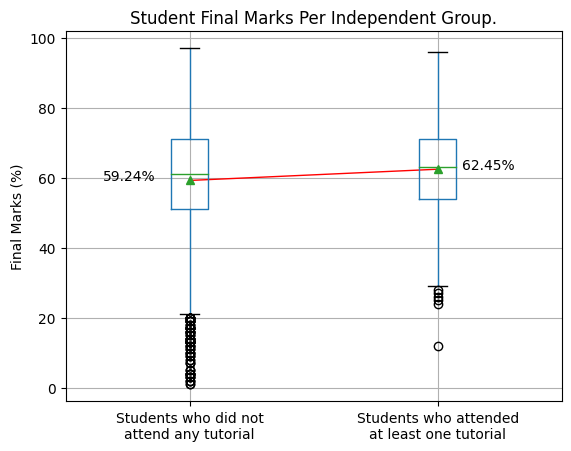

In [6]:
np.random.seed(1234)
GroupTtest_final_marks = {('Students who did not' '\n' 'attend any tutorial'): GroupB['FINAL.MARK'], 
                          ('Students who attended''\n''at least one tutorial'): GroupA['FINAL.MARK']}
Aavg, Bavg = np.average(GroupA['FINAL.MARK']), np.average(GroupB['FINAL.MARK'])
dF1 = pd.DataFrame.from_dict(data = GroupTtest_final_marks)
a,b = [1,Bavg],[2, Aavg]
x_values = [a[0], b[0]]
y_values = [a[1], b[1]]
plt.plot(x_values, y_values, 'r-', linewidth=1.0)             
dF1.boxplot(grid=True, showmeans=True)
plt.ylabel('Final Marks (%)')
plt.text(x=2.1,y=Aavg,s = '%.2f'%Aavg+'%', fontsize=10)
plt.text(x=0.65,y=Bavg,s = '%.2f'%Bavg+'%', fontsize=10)
plt.title('Student Final Marks Per Independent Group.')
#plt.savefig('ttest_'+fac+'_'+term+'.png')

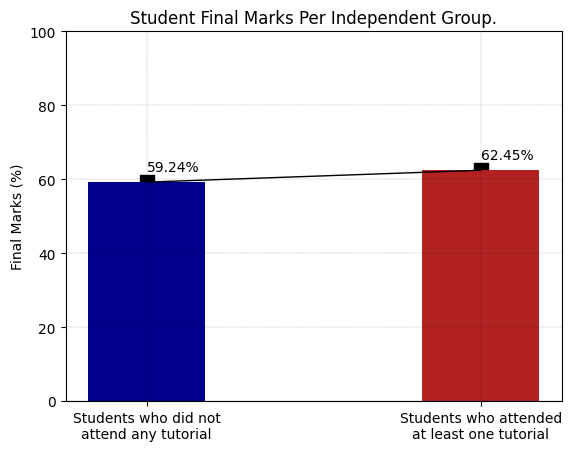

In [7]:
## line & bar plots
sa = {('Students who did not''\n''attend any tutorial'): Bavg,
    ('Students who attended''\n''at least one tutorial'): Aavg}
a,b = [0,Bavg],[1, Aavg]
x_values = [a[0], b[0]]
y_values = [a[1], b[1]]
plt.plot(x_values, y_values, 'k-', linewidth=1.0)
plt.scatter(x_values, y_values,  marker = 's', s = 100.0, c = 'k')
plt.bar(sa.keys(), sa.values(), color = ['darkblue', 'firebrick'], alpha =1.0, width = 0.35)
plt.ylim(0, 100)
plt.ylabel('Final Marks (%)')
plt.grid(color='k', linestyle='--', linewidth=.1)
plt.text(x=1.0,y=Aavg+3,s = '%.2f'%Aavg+'%', fontsize=10)
plt.text(x=0.0,y=Bavg+3,s = '%.2f'%Bavg+'%', fontsize=10)
plt.title('Student Final Marks Per Independent Group.')
plt.savefig('ttest_'+fac+'_'+term+'.png')

Text(0.5, 1.0, 'Student Final Marks Per Independent Group.')

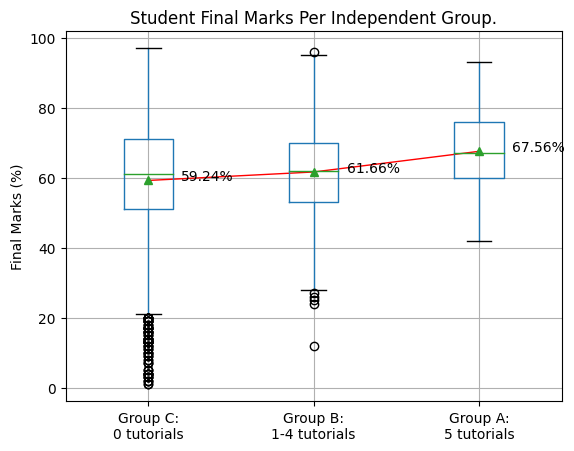

In [8]:
GroupANOVA_final_marks = {'Group C:''\n''0 tutorials': grpC['FINAL.MARK'],
                          'Group B:''\n''1-4 tutorials': grpB['FINAL.MARK'], 
                          'Group A:''\n''5 tutorials': grpA['FINAL.MARK']}
grpA_avg, grpB_avg, grpC_avg = np.average(grpA['FINAL.MARK']), np.average(grpB['FINAL.MARK']), np.average(grpC['FINAL.MARK'])
dF = pd.DataFrame.from_dict(data = GroupANOVA_final_marks)
A,B,C = [1,grpC_avg],[2, grpB_avg],[3, grpA_avg]
ABx_values = [A[0], B[0]]
ABy_values = [A[1], B[1]]
BCx_values = [B[0], C[0]]
BCy_values = [B[1], C[1]]
plt.plot(ABx_values, ABy_values, 'r-', linewidth=1.0)
plt.plot(BCx_values, BCy_values, 'r-', linewidth=1.0) 
dF.boxplot(grid=True, showmeans=True)
plt.ylabel('Final Marks (%)')
plt.text(x=3.2,y=grpA_avg,s = '%.2f'%grpA_avg+'%', fontsize=10)
plt.text(x=2.2,y=grpB_avg,s = '%.2f'%grpB_avg+'%', fontsize=10)
plt.text(x=1.2,y=grpC_avg,s = '%.2f'%grpC_avg+'%', fontsize=10)
plt.title('Student Final Marks Per Independent Group.')
#plt.savefig('anova_'+fac+'_'+term+'.png')

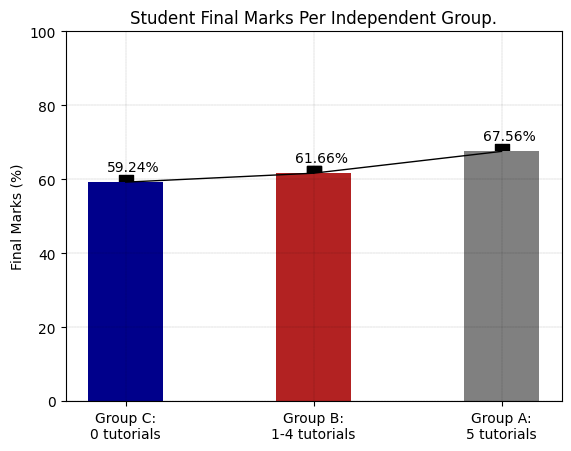

In [9]:
## line & bar plots
ss = {'Group C:''\n''0 tutorials': grpC_avg,
    'Group B:''\n''1-4 tutorials': grpB_avg, 
    'Group A:''\n''5 tutorials': grpA_avg}
A,B,C = [0,grpC_avg],[1, grpB_avg],[2, grpA_avg]
ABx_values = [A[0], B[0]]
ABy_values = [A[1], B[1]]
BCx_values = [B[0], C[0]]
BCy_values = [B[1], C[1]]
plt.plot(ABx_values, ABy_values, 'k-', linewidth=1.0)
plt.plot(BCx_values, BCy_values, 'k-', linewidth=1.0)
plt.scatter(ABx_values, ABy_values,  marker = 's', s = 100.0, c = 'k')
plt.scatter(BCx_values, BCy_values, marker = 's', s = 100.0, c = 'k')
plt.bar(ss.keys(), ss.values(), color = ['darkblue', 'firebrick', 'grey'], alpha =1.0, width = 0.4)
plt.text(x=1.9,y=grpA_avg+3,s = '%.2f'%grpA_avg+'%', fontsize=10)
plt.text(x=0.9,y=grpB_avg+3,s = '%.2f'%grpB_avg+'%', fontsize=10)
plt.text(x=-0.1,y=grpC_avg+3,s = '%.2f'%grpC_avg+'%', fontsize=10)
plt.grid(color='k', linestyle='--', linewidth=.1)
plt.ylim(0, 100)
plt.ylabel('Final Marks (%)')
plt.title('Student Final Marks Per Independent Group.')
plt.savefig('anova_'+fac+'_'+term+'.png')

In [10]:
pdf.multi_cell(0, 5, txt = str(s14), align = 'L')
pdf.cell(0, 5, txt = '', align = 'C', ln=13)
pdf.ln(0.25)
pdf.set_font('Arial','B',10.0)
pdf.cell(0, 5, txt = '3. Understanding tutorial attendance in relation to academic performance.', ln =14, align = 'L')
pdf.cell(0, 5, txt = '', ln =15, align = 'C')
pdf.ln(0.25)
pdf.set_font('Arial','',10.0)
sa = ('The following section presents the findings from the analysis of tutorial attendance in relation to academic performance \
for each module in the faculty. Data between 2019 - 2022 obtained from attendance lists and academic performance is analysed to determine \
whether students who attend tutorials perform better academically than the students who do not attend tutorials,  and whether attending at least 5  tutorials makes a difference to academic performance.  Furthermore, the relationship between \
academic performance and tutorial attendance is investigated. Finally, the relationship between tutorial attendance and \
academic performance is investigated within the top performing academic group and the lowest performing academic \
group.').format()
pdf.multi_cell(0, 5, txt = str(sa), align = 'L')
pdf.cell(0, 5, txt = '', ln =16, align = 'C')
pdf.multi_cell(0, 5, txt = 'For each faculty a summary of results is presented first to allow for an overall understanding of tutorial attendance in relation to academic performance. Thereafter, a section entitled Evidence is presented which details all of the results from the statistical analysis.', align = 'L')
pdf.cell(0, 5, txt = '', ln =17, align = 'C')
pdf.image('kindpng_2007834.jpeg', x = 10, y = 255, w = 187, h = 5, type = 'PNG')
pdf.cell(0, 5, txt = '', ln =17, align = 'C')
pdf.cell(0, 5, txt = '', ln =17, align = 'C')
#pdf.cell(0, 5, txt = '', ln =17, align = 'C')
#pdf.cell(0, 5, txt = '', ln =17, align = 'C')
pdf.cell(0, 5, txt = '1', ln =17, align = 'C')

### We employ boxplot to visualize groups (A & B) for pytTea and (A, B, C) for the ANOVA.


From the plot we can already visualize how Males ($\mu_{M} \sim 155.52$) have higher average heartbeat per second after the surgery than Females ($\mu_{F} \sim 147.20$) as already calculated.
<center> <font size="5"> <b> Independent Two Sample T-test </b></font> 
</center>  
To show that our calculations are not by chance, and that the difference is statistically significant, we run the independent T-test analysis. We employ the T-test formular:
<center> <font size="5"> $T_{test} = \frac{\mu_{1} - \mu_{2}}{ \sqrt{ \frac{S_{1}^{2}}{n_{1}} + \frac{S_{2}^{2}}{n_{2}} } }$</font> 
</center>

Where $S_{i}^{2}$ and $n_{i}$ are the standard deviations and sample sizes of groups A and B. If the p-value associated with the t-test is greater or equal to 0.05, we confirm the null hypothesis or virce-versa.

In [11]:
# running the t-test analysis
X, Y = GroupA['FINAL.MARK'], GroupB['FINAL.MARK']

t_analysis = Ttest.T_test(X,Y)

try:
    t, p_test = t_analysis[0], t_analysis[1]
    #break
    #if np.isnan(t) == True:
    #t = 0.2
    #p_test = 0.15
except (TypeError, ValueError):
    print('x')
    #continue
    


T-test = 5.748 p-value = 9.551E-09 

Since the p-value: 9.55E-09 < 0.05, we reject the Null Hypothesis, i.e, students who attend the A_Step Supplemental Instruction tutorials DO perform significantly better than those that do not attend the tutorials at all.


<center> <font size="5"> <b> One-way ANOVA </b></font> 
</center> 

In [12]:
anova = OneWay.anova(grpA['FINAL.MARK'], grpB['FINAL.MARK'], grpC['FINAL.MARK'])

F-stat: 24.433 
 p-value: 2.7E-11 

eta2: 0.998 

An effect size was calculated, and a large effect is found: 0.998 

The Multi-sample F-statistic determined is F-stat: 24.433 .The calculated p-value: 2.7E-11 ,is less than 0.05 therefore we reject the Null Hypothesis.


<center> <font size="5"> <b> Effect Size </b></font> 
</center>
An effect size refers to the size or magnitude of an effect or result as it would be expected to occur in a population. This can be measured in two different categories:

- Association or Correlation
- Difference


In the association category we determine the association between variables (final mark vs attendance), while in difference category we quantify the difference between variables of two different groups (e.g. difference between final mark averages of students who attended and not).

### - Association/ Correlation

### - Difference Effect Size

To determine the Effect Size difference, we employ Cohen's d method, which measures the difference between the mean from two Gaussian-distributed variables. The effect size is quantifified by the parameter d, which can be interpreted as follows:

- Small Effect Size: d=0.20
- Medium Effect Size: d=0.50
- Large Effect Size: d=0.80


In [13]:
l = [len(GroupA['FINAL.MARK']), len(GroupB['FINAL.MARK'])]
if l[0] > 0 and l[1] > 0:
    d = Ttest.cohend(GroupA['FINAL.MARK'], GroupB['FINAL.MARK'])
    print('Cohens d: %.3f' % d)
elif l[0] == 0 or l[1] == 0:
    print('One of Group A and/or B is missing data.')

The effect size determined is medium, i.e, d: 0.208
Cohens d: 0.208


In [14]:
#The determination coefficient between student attendance and final mark...
att, perf = np.array([GroupA['freq']]) , np.array([GroupA['FINAL.MARK']])
x, y = att.reshape(-1,1), perf.reshape(-1,1)
res = OneWay.Regression(x,y)
R2 = res
R2_perc = R2/100

The determination coefficient between student attendance and final mark is 0.042 , i.e 4.23 % of the variation in final marks of students can be explained by the variation in tutorial attendance


In [15]:
#corr_dat = {'FINAL.MARK': GroupA['FINAL.MARK'], 'freq': GroupA['freq'], 'GR_12_ADSCORE':pd.to_numeric(GroupA['GR_12_ADSCORE'])}

corr_dat = {'FINAL.MARK': GroupA['FINAL.MARK'], 'freq': GroupA['freq']}

GroupAtt = pd.DataFrame.from_dict(data = corr_dat)

f, p, eta2= anova[0], anova[1], anova[2]
if p < 0.05:
    
    Post_Hoc = Posthoc.Post_hoc(grpA['FINAL.MARK'], grpB['FINAL.MARK'], grpC['FINAL.MARK'], GroupAtt, f, p)
    ppost, A, B  = Post_Hoc['pval'], Post_Hoc['A'], Post_Hoc['B']

    c = ppost.dropna()
    cavg = np.average(c)
    cc = Post_Hoc.loc[lambda Post_Hoc: ppost < 0.05]
elif p >= 0.05:
    print(' The Null Hypothesis has been accepted and therefore no need for a post-hoc analysis...')


POST HOC TESTS

     A       B    mean(A)    mean(B)     diff       se        T       df     pval     cohen
------  ------  ---------  ---------  -------  -------  -------  -------  -------  --------
 1.000   2.000     60.975     61.243   -0.268    1.062   -0.253  479.471    1.000    -0.021
 1.000   3.000     60.975     62.505   -1.530    1.209   -1.265  208.648    0.999    -0.122
 1.000   4.000     60.975     65.662   -4.687    1.598   -2.934   95.722    0.290    -0.364
 1.000   5.000     60.975     63.205   -2.230    1.628   -1.369   60.693    0.997    -0.175
 1.000   6.000     60.975     68.333   -7.358    2.276   -3.234   23.718    0.207    -0.571
 1.000   7.000     60.975     68.526   -7.551    2.750   -2.746   20.200    0.448    -0.583
 1.000   8.000     60.975     72.167  -11.192    3.590   -3.117   11.761    0.307    -0.862
 1.000   9.000     60.975     63.200   -2.225    5.164   -0.431    4.130    1.000    -0.171
 1.000  10.000     60.975     71.667  -10.692    3.246   -3.294

/Users/tekanombonani/miniconda3/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/tekanombonani/miniconda3/lib/python3.10/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/tekanombonani/miniconda3/lib/python3.10/site-packages/pingouin/effsize.py:803: RuntimeWarning: Degrees of freedom <= 0 for slice
  poolsd = np.sqrt(((nx - 1) * x.var(ddof=1) + (ny - 1) * y.var(ddof=1)) / dof)
/Users/tekanombonani/miniconda3/lib/python3.10/site-packages/pingouin/effsize.py:788: RuntimeWarning: divide by zero encountered in divide
  d = (x.mean() - y) / x.std(ddof=1)


In [16]:
try:
    coR, _ = pearsonr(GroupA['freq'], GroupA['FINAL.MARK'])
    corr = coR.round(2)
    print('Pearsons correlation: %.3f' % corr)
    r = Correlate.Corr(GroupAtt)
    pval = float(r[0]['p-val'])
    print(pval)
except (ValueError, AttributeError):
    print('x')
    #lnXcr = 'No'

Pearsons correlation: 0.210
  n      r  CI95%          p-val          BF10    power
---  -----  -----------  -------  ------------  -------
928  0.206  [0.14 0.27]    0.000  19720000.000    1.000

Pearson p-val~: 2.487E-10
2.4865219333609375e-10


/Users/tekanombonani/Desktop/Faculty_Reports/Correlate.py:7: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print('Pearson p-val~: %.3E' %corr['p-val'])
/var/folders/hq/hgtdbcp908zc9zbmtl3kkg880000gr/T/ipykernel_26817/246442049.py:6: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  pval = float(r[0]['p-val'])


In [17]:
def tabfill(x, y, z, e, t):
    if x <= 0.05:
        if 0 < y <= 0.2:
            ttXst = 'Yes'
        elif 0.2 < y <= 0.5:
            ttXst = 'Yes'
        elif 0.5 < y < 0.8:
            ttXst = 'Yes*'
        elif y >= 0.8:
            ttXst = 'Yes*'                        
        elif y <= 0:
            ttXst = 'No'
        if np.isnan(y) == True:
            ttXst = 'No'
    elif x > 0.05:
        if 0 < y <= 0.2:
            ttXst = 'No'
        elif 0.2 < y <= 0.5:
            ttXst = 'No'
        elif 0.5 < y < 0.8:
            ttXst = 'No*'
        elif y >= 0.8:
            ttXst = 'No*'
        elif y <= 0:
            ttXst = 'No'
        if np.isnan(y) == True:
            ttXst = 'No'
            
    if np.isnan(x) == True:
        ttXst = 'No'
    
    if z <= 0.05:
        if 0 < e <= 0.2:
            anXva = 'Yes'
        elif 0.2 < e <= 0.5:
            anXva = 'Yes'
        elif 0.5 < e < 0.8:
            anXva = 'Yes*'
        elif e >= 0.8:
            anXva = 'Yes*'
        elif e <= 0:
            anXva = 'No'
        if np.isnan(e) == True:
            anXva = 'Yes'
    elif z > 0.05:
        if e <= 0.2:
            anXva = 'No'
        elif 0.2 < e <= 0.5:
            anXva = 'No'
        elif 0.5 < e < 0.8:
            anXva = 'No*'
        elif e >= 0.8:
            anXva = 'No*'
        elif e <= 0:
            anXva = 'No'
        if np.isnan(e) == True:
            anXva = 'No'
            
    if np.isnan(z) == True:
        anXva = 'No'
        
    if t <= 0.05:
        lnXcr = 'Yes'
    elif t > 0.05:
        lnXcr = 'No'
        
    if np.isnan(t) == True:
        lnXcr = 'No'
        
    return [ttXst, anXva, lnXcr]

In [18]:
k = []
ana = []
for j, i in enumerate(un):
    
    dt = dataGrab.dataSelector1(fac, term, i, camp)

    GroupA, GroupB, grpA, grpB, grpC, s1, s2 = dt[0], dt[1], dt[2], dt[3], dt[4], dt[5], dt[6]
    
    
        # running the t-test analysis
    X, Y = GroupA['FINAL.MARK'], GroupB['FINAL.MARK']

    t_analysis = Ttest.T_test(X,Y)
    try:
        t1, p_test1 = t_analysis[0], t_analysis[1]
    except (TypeError, ValueError):
        p_test1 = np.nan
        continue

        
    l = [len(grpA['FINAL.MARK']), len(grpB['FINAL.MARK']), len(grpC['FINAL.MARK'])]
    Av = [np.average(grpA['FINAL.MARK']), np.average(grpB['FINAL.MARK']), np.average(grpC['FINAL.MARK'])]
    
 #   if l[0] and l[1] > 1:
  #      if Av[0] and Av[1] > 0:
    try:        
        d1 = Ttest.cohend(GroupA['FINAL.MARK'], GroupB['FINAL.MARK'])
        print('Cohens d: %.3f' % d1)
    except(ZeroDivisionError):
        d1 = np.nan
        continue
        
        
    #if l[0] and l[1] and l[2] > 1:
    anova1 = OneWay.anova(grpA['FINAL.MARK'], grpB['FINAL.MARK'], grpC['FINAL.MARK'])   # if Av[0] and Av[1] and Av[2] > 1:
    try:                
        f1, p1, eta2_2 = anova1[0], anova1[1], anova1[2]
    except F_onewayBadInputSizesWarning:
        f1, p1, eta_2 = np.nan, np.nan, np.nan
        continue

    
    att, perf = np.array([GroupA['freq']]) , np.array([GroupA['FINAL.MARK']])
    x, y = att.reshape(-1,1), perf.reshape(-1,1)
    try:
        res1 = OneWay.Regression(x,y)
        R22 = res1
        R2_perc2 = R22/100
    except ValueError:
        R22 = np.nan
        R2_perc2 = np.nan
        continue
    
    corr_dat = {'FINAL.MARK': GroupA['FINAL.MARK'], 'freq': GroupA['freq']}

    GroupAtt = pd.DataFrame.from_dict(data = corr_dat)

    
    if p1 < 0.05:
    
        Post_Hoc = Posthoc.Post_hoc(grpA['FINAL.MARK'], grpB['FINAL.MARK'], grpC['FINAL.MARK'], GroupAtt, f1, p1)
        ppost, A, B  = Post_Hoc['pval'], Post_Hoc['A'], Post_Hoc['B']

        c = ppost.dropna()
        cavg = np.average(c)
        cc = Post_Hoc.loc[lambda Post_Hoc: ppost < 0.05]
    elif p1 >= 0.05:
        #cc = 0
        print(' The Null Hypothesis has been accepted and therefore no need for a post-hoc analysis...')    
    
    try:
        coR, _ = pearsonr(GroupA['freq'], GroupA['FINAL.MARK'])
        corr1 = coR.round(2)
        print('Pearsons correlation: %.3f' % corr)
        r = Correlate.Corr(GroupAtt)
        pval1 = float(r[0]['p-val'])
        print(pval1)
    except (ValueError, AttributeError):
        pval1 = np.nan
        #print(pval1)
        continue
        
    dec = tabfill(p_test1, d1, p1, eta2_2, pval1)
    stat_val = [i, t1, p_test1, d1, f1, p1, eta2_2, R22, R2_perc2, corr1, pval1]
    k.append(dec)
    ana.append(stat_val)


 Out of a total number of 838 students enrolled for the module LHIS1514 on the MAIN Campus, 162 attended at least one A_Step SI tutorial and scored an average of 68.02 % on their final mark, while 676 did not attend any of the tutorials and obtained an average of 63.94 % on their final mark.

 Furthermore,  3 students attended at least 5 of the offered tutorials (Group A) and reached an average of 73.67 % on their final mark,  while 159 students attended between 1-4 tutorials (Group B) and scored an average 67.91 %. Finally the 676 students that did not attend any of the tutorials are labelled (Group C). Refer to plots above for visualization of the data distributions.
T-test = 3.717 p-value = 2.149E-04 

Since the p-value: 2.15E-04 < 0.05, we reject the Null Hypothesis, i.e, students who attend the A_Step Supplemental Instruction tutorials DO perform significantly better than those that do not attend the tutorials at all.
The effect size determined is medium, i.e, d: 0.325
Cohens d: 

/Users/tekanombonani/Desktop/Faculty_Reports/Correlate.py:7: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print('Pearson p-val~: %.3E' %corr['p-val'])
/var/folders/hq/hgtdbcp908zc9zbmtl3kkg880000gr/T/ipykernel_26817/1100596507.py:76: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  pval1 = float(r[0]['p-val'])



 Out of a total number of 797 students enrolled for the module LILS1514 on the MAIN Campus, 192 attended at least one A_Step SI tutorial and scored an average of 57.07 % on their final mark, while 605 did not attend any of the tutorials and obtained an average of 51.64 % on their final mark.

 Furthermore,  29 students attended at least 5 of the offered tutorials (Group A) and reached an average of 60.97 % on their final mark,  while 163 students attended between 1-4 tutorials (Group B) and scored an average 56.38 %. Finally the 605 students that did not attend any of the tutorials are labelled (Group C). Refer to plots above for visualization of the data distributions.
T-test = 5.661 p-value = 2.101E-08 

Since the p-value: 2.10E-08 < 0.05, we reject the Null Hypothesis, i.e, students who attend the A_Step Supplemental Instruction tutorials DO perform significantly better than those that do not attend the tutorials at all.
The effect size determined is medium, i.e, d: 0.469
Cohens d:

/Users/tekanombonani/miniconda3/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/tekanombonani/miniconda3/lib/python3.10/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/tekanombonani/Desktop/Faculty_Reports/Correlate.py:7: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print('Pearson p-val~: %.3E' %corr['p-val'])
/var/folders/hq/hgtdbcp908zc9zbmtl3kkg880000gr/T/ipykernel_26817/1100596507.py:76: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  pval1 = float(r[0]['p-val'])



POST HOC TESTS

     A       B    mean(A)    mean(B)     diff       se        T       df     pval    cohen
------  ------  ---------  ---------  -------  -------  -------  -------  -------  -------
 1.000   2.000     55.667     56.143   -0.476    1.712   -0.278  108.785    1.000   -0.050
 1.000   3.000     55.667     57.348   -1.681    2.120   -0.793   40.600    1.000   -0.175
 1.000   4.000     55.667     59.846   -4.179    3.234   -1.292   15.450    0.968   -0.416
 1.000   5.000     55.667     57.667   -2.000    2.441   -0.819   17.476    0.999   -0.208
 1.000   6.000     55.667     63.600   -7.933    3.481   -2.279    4.974    0.566   -0.811
 1.000   7.000     55.667     61.000   -5.333    1.325   -4.026   29.667    0.015   -0.549
 1.000   8.000     55.667     67.500  -11.833    5.197   -2.277    3.299    0.589   -1.195
 1.000  11.000     55.667     58.000   -2.333  nan      nan      nan      nan       -0.236
 1.000  12.000     55.667     51.000    4.667  nan      nan      nan     

/Users/tekanombonani/miniconda3/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/tekanombonani/miniconda3/lib/python3.10/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/tekanombonani/Desktop/Faculty_Reports/Correlate.py:7: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print('Pearson p-val~: %.3E' %corr['p-val'])
/var/folders/hq/hgtdbcp908zc9zbmtl3kkg880000gr/T/ipykernel_26817/1100596507.py:76: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  pval1 = float(r[0]['p-val'])



POST HOC TESTS

     A       B    mean(A)    mean(B)     diff       se        T       df     pval    cohen
------  ------  ---------  ---------  -------  -------  -------  -------  -------  -------
 1.000   2.000     62.375     61.263    1.112    2.181    0.510  101.191    1.000    0.089
 1.000   3.000     62.375     62.776   -0.401    1.873   -0.214  107.609    1.000   -0.036
 1.000   4.000     62.375     67.233   -4.858    2.240   -2.168   52.871    0.806   -0.431
 1.000   5.000     62.375     65.409   -3.034    2.296   -1.321   37.513    0.998   -0.272
 1.000   6.000     62.375     68.111   -5.736    4.080   -1.406    9.507    0.987   -0.497
 1.000   7.000     62.375     69.444   -7.069    3.741   -1.890    9.838    0.888   -0.617
 1.000   8.000     62.375     66.750   -4.375    2.818   -1.552    4.390    0.948   -0.385
 1.000   9.000     62.375     66.500   -4.125    5.193   -0.794    3.332    1.000   -0.359
 1.000  10.000     62.375     71.667   -9.292    3.390   -2.741    2.583 

/Users/tekanombonani/miniconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:520: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/tekanombonani/miniconda3/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/tekanombonani/miniconda3/lib/python3.10/site-packages/scipy/stats/_stats_py.py:4133: DegenerateDataWarning: at least one input has length 0
  warnings.warn(stats.DegenerateDataWarning('at least one input '
/Users/tekanombonani/Desktop/Faculty_Reports/Correlate.py:7: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print('Pearson p-val~: %.3E' %corr['p-val'])
/var/folders/hq/hgtdbcp908zc9zbmtl3kkg880000gr/T/ipykernel_26817/1100596507.py:76: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in th


 Out of a total number of 909 students enrolled for the module EACC1614 on the MAIN Campus, 61 attended at least one A_Step SI tutorial and scored an average of 56.69 % on their final mark, while 848 did not attend any of the tutorials and obtained an average of 57.6 % on their final mark.

 Furthermore,  0 students attended at least 5 of the offered tutorials (Group A) and reached an average of nan % on their final mark,  while 61 students attended between 1-4 tutorials (Group B) and scored an average 56.69 %. Finally the 848 students that did not attend any of the tutorials are labelled (Group C). Refer to plots above for visualization of the data distributions.
T-test = -0.361 p-value = 7.185E-01 

Since the p-value: 7.2E-01 > 0.05, we accept the Null Hypothesis, i.e, students who attend the A_Step Supplemental Instruction tutorials at least once perform similar to those who do not attend the tutorials.
The effect size determined is very small, i.e, d: -0.048
Cohens d: -0.048
F-sta

/Users/tekanombonani/miniconda3/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/tekanombonani/miniconda3/lib/python3.10/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/tekanombonani/Desktop/Faculty_Reports/Correlate.py:7: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print('Pearson p-val~: %.3E' %corr['p-val'])
/var/folders/hq/hgtdbcp908zc9zbmtl3kkg880000gr/T/ipykernel_26817/1100596507.py:76: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  pval1 = float(r[0]['p-val'])



POST HOC TESTS

    A       B    mean(A)    mean(B)     diff       se        T       df     pval    cohen
-----  ------  ---------  ---------  -------  -------  -------  -------  -------  -------
1.000   2.000     59.298     61.536   -2.238    2.196   -1.019  126.580    0.991   -0.172
1.000   3.000     59.298     64.050   -4.752    3.077   -1.545   31.509    0.864   -0.357
1.000   4.000     59.298     61.875   -2.577    3.488   -0.739   22.120    0.999   -0.192
1.000   5.000     59.298     63.875   -4.577    4.776   -0.958    8.558    0.988   -0.339
1.000   6.000     59.298     70.333  -11.036    3.755   -2.939    6.994    0.246   -0.828
1.000   7.000     59.298     72.167  -12.869    6.528   -1.971    5.556    0.641   -0.940
1.000   8.000     59.298     78.667  -19.369    9.182   -2.110    2.108    0.626   -1.422
1.000   9.000     59.298     50.000    9.298  nan      nan      nan      nan        0.685
1.000  11.000     59.298     87.000  -27.702  nan      nan      nan      nan       

/Users/tekanombonani/miniconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:520: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/tekanombonani/miniconda3/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/tekanombonani/miniconda3/lib/python3.10/site-packages/scipy/stats/_stats_py.py:4133: DegenerateDataWarning: at least one input has length 0
  warnings.warn(stats.DegenerateDataWarning('at least one input '
/Users/tekanombonani/miniconda3/lib/python3.10/site-packages/pingouin/power.py:861: UserWarning: Sample size is too small to estimate power (n <= 4). Returning NaN.
  warnings.warn("Sample size is too small to estimate power (n <= 4). Returning NaN.")
/Users/tekanombonani/Desktop/Faculty_Reports/Correlate.py:7: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(s


 Out of a total number of 840 students enrolled for the module EBUS1614 on the MAIN Campus, 4 attended at least one A_Step SI tutorial and scored an average of 67.5 % on their final mark, while 836 did not attend any of the tutorials and obtained an average of 64.48 % on their final mark.

 Furthermore,  0 students attended at least 5 of the offered tutorials (Group A) and reached an average of nan % on their final mark,  while 4 students attended between 1-4 tutorials (Group B) and scored an average 67.5 %. Finally the 836 students that did not attend any of the tutorials are labelled (Group C). Refer to plots above for visualization of the data distributions.
T-test = 0.415 p-value = 6.780E-01 

Since the p-value: 6.8E-01 > 0.05, we accept the Null Hypothesis, i.e, students who attend the A_Step Supplemental Instruction tutorials at least once perform similar to those who do not attend the tutorials.
The effect size determined is medium, i.e, d: 0.208
Cohens d: 0.208
F-stat: nan 
 p

/Users/tekanombonani/miniconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:520: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/tekanombonani/miniconda3/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/tekanombonani/miniconda3/lib/python3.10/site-packages/scipy/stats/_stats_py.py:4133: DegenerateDataWarning: at least one input has length 0
  warnings.warn(stats.DegenerateDataWarning('at least one input '
/Users/tekanombonani/miniconda3/lib/python3.10/site-packages/pingouin/power.py:861: UserWarning: Sample size is too small to estimate power (n <= 4). Returning NaN.
  warnings.warn("Sample size is too small to estimate power (n <= 4). Returning NaN.")
/Users/tekanombonani/Desktop/Faculty_Reports/Correlate.py:7: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(s


 Out of a total number of 17 students enrolled for the module EECF1614 on the MAIN Campus, 4 attended at least one A_Step SI tutorial and scored an average of 47.0 % on their final mark, while 13 did not attend any of the tutorials and obtained an average of 62.15 % on their final mark.

 Furthermore,  0 students attended at least 5 of the offered tutorials (Group A) and reached an average of nan % on their final mark,  while 4 students attended between 1-4 tutorials (Group B) and scored an average 47.0 %. Finally the 13 students that did not attend any of the tutorials are labelled (Group C). Refer to plots above for visualization of the data distributions.
T-test = -1.991 p-value = 6.501E-02 

Since the p-value: 6.5E-02 > 0.05, we accept the Null Hypothesis, i.e, students who attend the A_Step Supplemental Instruction tutorials at least once perform similar to those who do not attend the tutorials.
The effect size determined is very small, i.e, d: -1.138
Cohens d: -1.138
F-stat: nan

/Users/tekanombonani/miniconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:520: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/tekanombonani/miniconda3/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/tekanombonani/miniconda3/lib/python3.10/site-packages/scipy/stats/_stats_py.py:4133: DegenerateDataWarning: at least one input has length 0
  warnings.warn(stats.DegenerateDataWarning('at least one input '
/Users/tekanombonani/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)



 Out of a total number of 1 students enrolled for the module FRAN2614 on the MAIN Campus, 1 attended at least one A_Step SI tutorial and scored an average of 65.0 % on their final mark, while 0 did not attend any of the tutorials and obtained an average of nan % on their final mark.

 Furthermore,  0 students attended at least 5 of the offered tutorials (Group A) and reached an average of nan % on their final mark,  while 1 students attended between 1-4 tutorials (Group B) and scored an average 65.0 %. Finally the 0 students that did not attend any of the tutorials are labelled (Group C). Refer to plots above for visualization of the data distributions.
T-test = nan p-value = NAN 

Cohens d: nan
F-stat: nan 
 p-value: NAN 

eta2: nan 

The determination coefficient between student attendance and final mark is nan , i.e nan % of the variation in final marks of students can be explained by the variation in tutorial attendance


/Users/tekanombonani/miniconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:520: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/tekanombonani/miniconda3/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/tekanombonani/miniconda3/lib/python3.10/site-packages/scipy/stats/_stats_py.py:4133: DegenerateDataWarning: at least one input has length 0
  warnings.warn(stats.DegenerateDataWarning('at least one input '
/Users/tekanombonani/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)



 Out of a total number of 1 students enrolled for the module ECAP2614 on the MAIN Campus, 1 attended at least one A_Step SI tutorial and scored an average of 54.0 % on their final mark, while 0 did not attend any of the tutorials and obtained an average of nan % on their final mark.

 Furthermore,  0 students attended at least 5 of the offered tutorials (Group A) and reached an average of nan % on their final mark,  while 1 students attended between 1-4 tutorials (Group B) and scored an average 54.0 %. Finally the 0 students that did not attend any of the tutorials are labelled (Group C). Refer to plots above for visualization of the data distributions.
T-test = nan p-value = NAN 

Cohens d: nan
F-stat: nan 
 p-value: NAN 

eta2: nan 

The determination coefficient between student attendance and final mark is nan , i.e nan % of the variation in final marks of students can be explained by the variation in tutorial attendance

 Out of a total number of 10 students enrolled for the modul

/Users/tekanombonani/miniconda3/lib/python3.10/site-packages/pingouin/power.py:861: UserWarning: Sample size is too small to estimate power (n <= 4). Returning NaN.
  warnings.warn("Sample size is too small to estimate power (n <= 4). Returning NaN.")
/Users/tekanombonani/Desktop/Faculty_Reports/Correlate.py:7: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print('Pearson p-val~: %.3E' %corr['p-val'])
/var/folders/hq/hgtdbcp908zc9zbmtl3kkg880000gr/T/ipykernel_26817/1100596507.py:76: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  pval1 = float(r[0]['p-val'])


In [19]:
len(k)

8

In [20]:
pdf.add_page()
pdf.set_font("Arial", 'B', size = 9)
pdf.cell(0, 5, txt = '', ln =19, align = 'C')
pdf.cell(0, 5, txt = 'Table 1. A summary of primary findings from an analysis of a sample of '+fac+' modules. ', ln =22, align = 'L')
pdf.ln(0.25)
#pdf.set_font("Arial", size = 10)
pdf.cell(0, 5, txt = '', ln =19, align = 'C')
pdf.set_font("Arial", 'B', size = 10)
line_height = pdf.font_size * 2.5
epw = pdf.w - 2*pdf.l_margin
th = pdf.font_size
col_width = epw / 4
size = len(ana)
dec = tabfill(p_test, d, p, eta2, pval)
ttXst, anXva, lnXcr = dec[0], dec[1], dec[2]
tab = {'Modules':[1, 1, 1, 1],'Do students who attend tutorials perfom significantly better than students who do not?' : [1, 1, 1, 1],
     'Do students who attend at least 5 tutorials perfom signifiicantly better than students who attend between 1-4 AND students that do not attend?' : [1, 1, 1, 1],
     'Is there a significant positive correlation between tutorial attendance and perfomance?' : [1, 1, 1, 1]}
tabular = pd.DataFrame.from_dict(tab)
col_list = list(tabular.columns)
pdf.multi_cell(20, 40, str(col_list[0]), 1, 0, 'C')
pdf.set_xy(30, 25)
pdf.multi_cell(50, 10, str(col_list[1]), 1, 0, 'C')
pdf.set_xy(80, 25)
pdf.multi_cell(70, 10, str(col_list[2]), 1, 0, 'C')
pdf.set_xy(150, 25)
pdf.multi_cell(50, 10, str(col_list[3]), 1, 0, 'C')
pdf.cell(20, 15, 'Faculty', border = 1, ln= 7, align = 'C')
pdf.ln(0.25) 
pdf.set_font("Arial", '', size = 10)
pdf.set_text_color(255, 0, 0)
pdf.set_xy(30, 65)
pdf.cell(50, 15, txt = str(ttXst), border = 1, ln=7, align = 'C')
pdf.set_xy(80, 65)
pdf.cell(70, 15, txt = str(anXva), border = 1, ln=7, align = 'C')
pdf.set_xy(150, 65)
pdf.cell(50, 15, txt = str(lnXcr), border = 1, ln=7, align = 'C')
pdf.set_text_color(0, 0, 0)

if size == 1:
    pdf.ln(0.25) 
    pdf.set_font("Arial", 'B', size = 10)
    pdf.cell(20, 15, ana[0][0], border = 1, ln= 9, align = 'C')   
    pdf.ln(0.25) 
    pdf.set_font("Arial", '', size = 10)
    pdf.set_text_color(0, 0, 255)
    pdf.set_xy(30, 80)
    pdf.cell(50, 15, txt = str(k[0][0]), border = 1, ln=7, align = 'C')
    pdf.set_xy(80, 80)
    pdf.cell(70, 15, txt = str(k[0][1]), border = 1, ln=7, align = 'C')
    pdf.set_xy(150, 80)
    pdf.cell(50, 15, txt = str(k[0][2]), border = 1, ln=7, align = 'C')

elif size == 2:
    pdf.ln(0.25) 
    pdf.set_font("Arial", 'B', size = 10)
    pdf.cell(20, 15, ana[0][0], border = 1, ln= 9, align = 'C')
    pdf.cell(20, 15, ana[1][0], border = 1, ln= 9, align = 'C')

    pdf.ln(0.25) 
    pdf.set_font("Arial", '', size = 10)
    pdf.set_text_color(0, 0, 255)
    pdf.set_xy(30, 80)
    pdf.cell(50, 15, txt = str(k[0][0]), border = 1, ln=7, align = 'C')
    pdf.set_xy(80, 80)
    pdf.cell(70, 15, txt = str(k[0][1]), border = 1, ln=7, align = 'C')
    pdf.set_xy(150, 80)
    pdf.cell(50, 15, txt = str(k[0][2]), border = 1, ln=7, align = 'C')
    
    pdf.set_xy(30, 95)
    pdf.cell(50, 15, txt = str(k[1][0]), border = 1, ln=7, align = 'C')
    pdf.set_xy(80, 95)
    pdf.cell(70, 15, txt = str(k[1][1]), border = 1, ln=7, align = 'C')
    pdf.set_xy(150, 95)
    pdf.cell(50, 15, txt = str(k[1][2]), border = 1, ln=7, align = 'C')
elif size == 3:
    pdf.ln(0.25) 
    pdf.set_font("Arial", 'B', size = 10)
    pdf.cell(20, 15, ana[0][0], border = 1, ln= 9, align = 'C')
    pdf.cell(20, 15, ana[1][0], border = 1, ln= 9, align = 'C')
    pdf.cell(20, 15, ana[2][0], border = 1, ln= 9, align = 'C')    

    pdf.ln(0.25) 
    pdf.set_font("Arial", '', size = 10)
    pdf.set_text_color(0, 0, 255)
    pdf.set_xy(30, 80)
    pdf.cell(50, 15, txt = str(k[0][0]), border = 1, ln=7, align = 'C')
    pdf.set_xy(80, 80)
    pdf.cell(70, 15, txt = str(k[0][1]), border = 1, ln=7, align = 'C')
    pdf.set_xy(150, 80)
    pdf.cell(50, 15, txt = str(k[0][2]), border = 1, ln=7, align = 'C')
    
    pdf.set_xy(30, 95)
    pdf.cell(50, 15, txt = str(k[1][0]), border = 1, ln=7, align = 'C')
    pdf.set_xy(80, 95)
    pdf.cell(70, 15, txt = str(k[1][1]), border = 1, ln=7, align = 'C')
    pdf.set_xy(150, 95)
    pdf.cell(50, 15, txt = str(k[1][2]), border = 1, ln=7, align = 'C')
    
    pdf.set_xy(30, 110)
    pdf.cell(50, 15, txt = str(k[2][0]), border = 1, ln=7, align = 'C')
    pdf.set_xy(80, 110)
    pdf.cell(70, 15, txt = str(k[2][1]), border = 1, ln=7, align = 'C')
    pdf.set_xy(150, 110)
    pdf.cell(50, 15, txt = str(k[2][2]), border = 1, ln=7, align = 'C')

elif size == 4:
    pdf.ln(0.25) 
    pdf.set_font("Arial", 'B', size = 10)
    pdf.cell(20, 15, ana[0][0], border = 1, ln= 9, align = 'C')
    pdf.cell(20, 15, ana[1][0], border = 1, ln= 9, align = 'C')
    pdf.cell(20, 15, ana[2][0], border = 1, ln= 9, align = 'C')
    pdf.cell(20, 15, ana[3][0], border = 1, ln= 9, align = 'C')    

    pdf.ln(0.25) 
    pdf.set_font("Arial", '', size = 10)
    pdf.set_text_color(0, 0, 255)
    pdf.set_xy(30, 80)
    pdf.cell(50, 15, txt = str(k[0][0]), border = 1, ln=7, align = 'C')
    pdf.set_xy(80, 80)
    pdf.cell(70, 15, txt = str(k[0][1]), border = 1, ln=7, align = 'C')
    pdf.set_xy(150, 80)
    pdf.cell(50, 15, txt = str(k[0][2]), border = 1, ln=7, align = 'C')
    
    pdf.set_xy(30, 95)
    pdf.cell(50, 15, txt = str(k[1][0]), border = 1, ln=7, align = 'C')
    pdf.set_xy(80, 95)
    pdf.cell(70, 15, txt = str(k[1][1]), border = 1, ln=7, align = 'C')
    pdf.set_xy(150, 95)
    pdf.cell(50, 15, txt = str(k[1][2]), border = 1, ln=7, align = 'C')
    
    pdf.set_xy(30, 110)
    pdf.cell(50, 15, txt = str(k[2][0]), border = 1, ln=7, align = 'C')
    pdf.set_xy(80, 110)
    pdf.cell(70, 15, txt = str(k[2][1]), border = 1, ln=7, align = 'C')
    pdf.set_xy(150, 110)
    pdf.cell(50, 15, txt = str(k[2][2]), border = 1, ln=7, align = 'C')
    
    pdf.set_xy(30, 125)
    pdf.cell(50, 15, txt = str(k[3][0]), border = 1, ln=7, align = 'C')
    pdf.set_xy(80, 125)
    pdf.cell(70, 15, txt = str(k[3][1]), border = 1, ln=7, align = 'C')
    pdf.set_xy(150, 125)
    pdf.cell(50, 15, txt = str(k[3][2]), border = 1, ln=7, align = 'C')
    
elif size == 5:
    pdf.ln(0.25) 
    pdf.set_font("Arial", 'B', size = 10)
    pdf.cell(20, 15, ana[0][0], border = 1, ln= 9, align = 'C')
    pdf.cell(20, 15, ana[1][0], border = 1, ln= 9, align = 'C')
    pdf.cell(20, 15, ana[2][0], border = 1, ln= 9, align = 'C')
    pdf.cell(20, 15, ana[3][0], border = 1, ln= 9, align = 'C')
    pdf.cell(20, 15, ana[4][0], border = 1, ln= 9, align = 'C')

    pdf.ln(0.25) 
    pdf.set_font("Arial", '', size = 10)
    pdf.set_text_color(0, 0, 255)
    pdf.set_xy(30, 80)
    pdf.cell(50, 15, txt = str(k[0][0]), border = 1, ln=7, align = 'C')
    pdf.set_xy(80, 80)
    pdf.cell(70, 15, txt = str(k[0][1]), border = 1, ln=7, align = 'C')
    pdf.set_xy(150, 80)
    pdf.cell(50, 15, txt = str(k[0][2]), border = 1, ln=7, align = 'C')
    
    pdf.set_xy(30, 95)
    pdf.cell(50, 15, txt = str(k[1][0]), border = 1, ln=7, align = 'C')
    pdf.set_xy(80, 95)
    pdf.cell(70, 15, txt = str(k[1][1]), border = 1, ln=7, align = 'C')
    pdf.set_xy(150, 95)
    pdf.cell(50, 15, txt = str(k[1][2]), border = 1, ln=7, align = 'C')
    
    pdf.set_xy(30, 110)
    pdf.cell(50, 15, txt = str(k[2][0]), border = 1, ln=7, align = 'C')
    pdf.set_xy(80, 110)
    pdf.cell(70, 15, txt = str(k[2][1]), border = 1, ln=7, align = 'C')
    pdf.set_xy(150, 110)
    pdf.cell(50, 15, txt = str(k[2][2]), border = 1, ln=7, align = 'C')
    
    pdf.set_xy(30, 125)
    pdf.cell(50, 15, txt = str(k[3][0]), border = 1, ln=7, align = 'C')
    pdf.set_xy(80, 125)
    pdf.cell(70, 15, txt = str(k[3][1]), border = 1, ln=7, align = 'C')
    pdf.set_xy(150, 125)
    pdf.cell(50, 15, txt = str(k[3][2]), border = 1, ln=7, align = 'C')
    
    pdf.set_xy(30, 140)
    pdf.cell(50, 15, txt = str(k[4][0]), border = 1, ln=7, align = 'C')
    pdf.set_xy(80, 140)
    pdf.cell(70, 15, txt = str(k[4][1]), border = 1, ln=7, align = 'C')
    pdf.set_xy(150, 140)
    pdf.cell(50, 15, txt = str(k[4][2]), border = 1, ln=7, align = 'C')

    
elif size == 6:
    pdf.ln(0.25) 
    pdf.set_font("Arial", 'B', size = 10)
    pdf.cell(20, 15, ana[0][0], border = 1, ln= 9, align = 'C')
    pdf.cell(20, 15, ana[1][0], border = 1, ln= 9, align = 'C')
    pdf.cell(20, 15, ana[2][0], border = 1, ln= 9, align = 'C')
    pdf.cell(20, 15, ana[3][0], border = 1, ln= 9, align = 'C')
    pdf.cell(20, 15, ana[4][0], border = 1, ln= 9, align = 'C')
    pdf.cell(20, 15, ana[5][0], border = 1, ln= 9, align = 'C')
    
    pdf.ln(0.25) 
    pdf.set_font("Arial", '', size = 10)
    pdf.set_text_color(0, 0, 255)
    pdf.set_xy(30, 80)
    pdf.cell(50, 15, txt = str(k[0][0]), border = 1, ln=7, align = 'C')
    pdf.set_xy(80, 80)
    pdf.cell(70, 15, txt = str(k[0][1]), border = 1, ln=7, align = 'C')
    pdf.set_xy(150, 80)
    pdf.cell(50, 15, txt = str(k[0][2]), border = 1, ln=7, align = 'C')
    
    pdf.set_xy(30, 95)
    pdf.cell(50, 15, txt = str(k[1][0]), border = 1, ln=7, align = 'C')
    pdf.set_xy(80, 95)
    pdf.cell(70, 15, txt = str(k[1][1]), border = 1, ln=7, align = 'C')
    pdf.set_xy(150, 95)
    pdf.cell(50, 15, txt = str(k[1][2]), border = 1, ln=7, align = 'C')
    
    pdf.set_xy(30, 110)
    pdf.cell(50, 15, txt = str(k[2][0]), border = 1, ln=7, align = 'C')
    pdf.set_xy(80, 110)
    pdf.cell(70, 15, txt = str(k[2][1]), border = 1, ln=7, align = 'C')
    pdf.set_xy(150, 110)
    pdf.cell(50, 15, txt = str(k[2][2]), border = 1, ln=7, align = 'C')
    
    pdf.set_xy(30, 125)
    pdf.cell(50, 15, txt = str(k[3][0]), border = 1, ln=7, align = 'C')
    pdf.set_xy(80, 125)
    pdf.cell(70, 15, txt = str(k[3][1]), border = 1, ln=7, align = 'C')
    pdf.set_xy(150, 125)
    pdf.cell(50, 15, txt = str(k[3][2]), border = 1, ln=7, align = 'C')
    
    pdf.set_xy(30, 140)
    pdf.cell(50, 15, txt = str(k[4][0]), border = 1, ln=7, align = 'C')
    pdf.set_xy(80, 140)
    pdf.cell(70, 15, txt = str(k[4][1]), border = 1, ln=7, align = 'C')
    pdf.set_xy(150, 140)
    pdf.cell(50, 15, txt = str(k[4][2]), border = 1, ln=7, align = 'C') 
    
    pdf.set_xy(30, 155)
    pdf.cell(50, 15, txt = str(k[5][0]), border = 1, ln=7, align = 'C')
    pdf.set_xy(80, 155)
    pdf.cell(70, 15, txt = str(k[5][1]), border = 1, ln=7, align = 'C')
    pdf.set_xy(150, 155)
    pdf.cell(50, 15, txt = str(k[5][2]), border = 1, ln=7, align = 'C')
    

elif size == 7:
    pdf.ln(0.25) 
    pdf.set_font("Arial", 'B', size = 10)
    pdf.cell(20, 15, ana[0][0], border = 1, ln= 9, align = 'C')
    pdf.cell(20, 15, ana[1][0], border = 1, ln= 9, align = 'C')
    pdf.cell(20, 15, ana[2][0], border = 1, ln= 9, align = 'C')
    pdf.cell(20, 15, ana[3][0], border = 1, ln= 9, align = 'C')
    pdf.cell(20, 15, ana[4][0], border = 1, ln= 9, align = 'C')
    pdf.cell(20, 15, ana[5][0], border = 1, ln= 9, align = 'C')
    pdf.cell(20, 15, ana[6][0], border = 1, ln= 9, align = 'C')  
    
    
    pdf.ln(0.25) 
    pdf.set_font("Arial", '', size = 10)
    pdf.set_text_color(0, 0, 255)
    pdf.set_xy(30, 80)
    pdf.cell(50, 15, txt = str(k[0][0]), border = 1, ln=7, align = 'C')
    pdf.set_xy(80, 80)
    pdf.cell(70, 15, txt = str(k[0][1]), border = 1, ln=7, align = 'C')
    pdf.set_xy(150, 80)
    pdf.cell(50, 15, txt = str(k[0][2]), border = 1, ln=7, align = 'C')
    
    pdf.set_xy(30, 95)
    pdf.cell(50, 15, txt = str(k[1][0]), border = 1, ln=7, align = 'C')
    pdf.set_xy(80, 95)
    pdf.cell(70, 15, txt = str(k[1][1]), border = 1, ln=7, align = 'C')
    pdf.set_xy(150, 95)
    pdf.cell(50, 15, txt = str(k[1][2]), border = 1, ln=7, align = 'C')
    
    pdf.set_xy(30, 110)
    pdf.cell(50, 15, txt = str(k[2][0]), border = 1, ln=7, align = 'C')
    pdf.set_xy(80, 110)
    pdf.cell(70, 15, txt = str(k[2][1]), border = 1, ln=7, align = 'C')
    pdf.set_xy(150, 110)
    pdf.cell(50, 15, txt = str(k[2][2]), border = 1, ln=7, align = 'C')
    
    pdf.set_xy(30, 125)
    pdf.cell(50, 15, txt = str(k[3][0]), border = 1, ln=7, align = 'C')
    pdf.set_xy(80, 125)
    pdf.cell(70, 15, txt = str(k[3][1]), border = 1, ln=7, align = 'C')
    pdf.set_xy(150, 125)
    pdf.cell(50, 15, txt = str(k[3][2]), border = 1, ln=7, align = 'C')
    
    pdf.set_xy(30, 140)
    pdf.cell(50, 15, txt = str(k[4][0]), border = 1, ln=7, align = 'C')
    pdf.set_xy(80, 140)
    pdf.cell(70, 15, txt = str(k[4][1]), border = 1, ln=7, align = 'C')
    pdf.set_xy(150, 140)
    pdf.cell(50, 15, txt = str(k[4][2]), border = 1, ln=7, align = 'C') 
    
    pdf.set_xy(30, 155)
    pdf.cell(50, 15, txt = str(k[5][0]), border = 1, ln=7, align = 'C')
    pdf.set_xy(80, 155)
    pdf.cell(70, 15, txt = str(k[5][1]), border = 1, ln=7, align = 'C')
    pdf.set_xy(150, 155)
    pdf.cell(50, 15, txt = str(k[5][2]), border = 1, ln=7, align = 'C')
    
    pdf.set_xy(30, 170)
    pdf.cell(50, 15, txt = str(k[6][0]), border = 1, ln=7, align = 'C')
    pdf.set_xy(80, 170)
    pdf.cell(70, 15, txt = str(k[6][1]), border = 1, ln=7, align = 'C')
    pdf.set_xy(150, 170)
    pdf.cell(50, 15, txt = str(k[6][2]), border = 1, ln=7, align = 'C')    

elif size == 8:
    
    pdf.ln(0.25) 
    pdf.set_font("Arial", 'B', size = 10)
    pdf.cell(20, 15, ana[0][0], border = 1, ln= 9, align = 'C')
    pdf.cell(20, 15, ana[1][0], border = 1, ln= 9, align = 'C')
    pdf.cell(20, 15, ana[2][0], border = 1, ln= 9, align = 'C')
    pdf.cell(20, 15, ana[3][0], border = 1, ln= 9, align = 'C')
    pdf.cell(20, 15, ana[4][0], border = 1, ln= 9, align = 'C')
    pdf.cell(20, 15, ana[5][0], border = 1, ln= 9, align = 'C')
    pdf.cell(20, 15, ana[6][0], border = 1, ln= 9, align = 'C')  
    pdf.cell(20, 15, ana[7][0], border = 1, ln= 9, align = 'C')
    
    pdf.ln(0.25) 
    pdf.set_font("Arial", '', size = 10)
    pdf.set_text_color(0, 0, 255)
    pdf.set_xy(30, 80)
    pdf.cell(50, 15, txt = str(k[0][0]), border = 1, ln=7, align = 'C')
    pdf.set_xy(80, 80)
    pdf.cell(70, 15, txt = str(k[0][1]), border = 1, ln=7, align = 'C')
    pdf.set_xy(150, 80)
    pdf.cell(50, 15, txt = str(k[0][2]), border = 1, ln=7, align = 'C')
    
    pdf.set_xy(30, 95)
    pdf.cell(50, 15, txt = str(k[1][0]), border = 1, ln=7, align = 'C')
    pdf.set_xy(80, 95)
    pdf.cell(70, 15, txt = str(k[1][1]), border = 1, ln=7, align = 'C')
    pdf.set_xy(150, 95)
    pdf.cell(50, 15, txt = str(k[1][2]), border = 1, ln=7, align = 'C')
    
    pdf.set_xy(30, 110)
    pdf.cell(50, 15, txt = str(k[2][0]), border = 1, ln=7, align = 'C')
    pdf.set_xy(80, 110)
    pdf.cell(70, 15, txt = str(k[2][1]), border = 1, ln=7, align = 'C')
    pdf.set_xy(150, 110)
    pdf.cell(50, 15, txt = str(k[2][2]), border = 1, ln=7, align = 'C')
    
    pdf.set_xy(30, 125)
    pdf.cell(50, 15, txt = str(k[3][0]), border = 1, ln=7, align = 'C')
    pdf.set_xy(80, 125)
    pdf.cell(70, 15, txt = str(k[3][1]), border = 1, ln=7, align = 'C')
    pdf.set_xy(150, 125)
    pdf.cell(50, 15, txt = str(k[3][2]), border = 1, ln=7, align = 'C')
    
    pdf.set_xy(30, 140)
    pdf.cell(50, 15, txt = str(k[4][0]), border = 1, ln=7, align = 'C')
    pdf.set_xy(80, 140)
    pdf.cell(70, 15, txt = str(k[4][1]), border = 1, ln=7, align = 'C')
    pdf.set_xy(150, 140)
    pdf.cell(50, 15, txt = str(k[4][2]), border = 1, ln=7, align = 'C') 
    
    pdf.set_xy(30, 155)
    pdf.cell(50, 15, txt = str(k[5][0]), border = 1, ln=7, align = 'C')
    pdf.set_xy(80, 155)
    pdf.cell(70, 15, txt = str(k[5][1]), border = 1, ln=7, align = 'C')
    pdf.set_xy(150, 155)
    pdf.cell(50, 15, txt = str(k[5][2]), border = 1, ln=7, align = 'C')
    
    pdf.set_xy(30, 170)
    pdf.cell(50, 15, txt = str(k[6][0]), border = 1, ln=7, align = 'C')
    pdf.set_xy(80, 170)
    pdf.cell(70, 15, txt = str(k[6][1]), border = 1, ln=7, align = 'C')
    pdf.set_xy(150, 170)
    pdf.cell(50, 15, txt = str(k[6][2]), border = 1, ln=7, align = 'C')  

    pdf.set_xy(30, 185)
    pdf.cell(50, 15, txt = str(k[7][0]), border = 1, ln=7, align = 'C')
    pdf.set_xy(80, 185)
    pdf.cell(70, 15, txt = str(k[7][1]), border = 1, ln=7, align = 'C')
    pdf.set_xy(150, 185)
    pdf.cell(50, 15, txt = str(k[7][2]), border = 1, ln=7, align = 'C') 

elif size == 9:
    pdf.ln(0.25) 
    pdf.set_font("Arial", 'B', size = 10)
    pdf.cell(20, 15, ana[0][0], border = 1, ln= 9, align = 'C')
    pdf.cell(20, 15, ana[1][0], border = 1, ln= 9, align = 'C')
    pdf.cell(20, 15, ana[2][0], border = 1, ln= 9, align = 'C')
    pdf.cell(20, 15, ana[3][0], border = 1, ln= 9, align = 'C')
    pdf.cell(20, 15, ana[4][0], border = 1, ln= 9, align = 'C')
    pdf.cell(20, 15, ana[5][0], border = 1, ln= 9, align = 'C')
    pdf.cell(20, 15, ana[6][0], border = 1, ln= 9, align = 'C')  
    pdf.cell(20, 15, ana[7][0], border = 1, ln= 9, align = 'C')
    pdf.cell(20, 15, ana[8][0], border = 1, ln= 9, align = 'C')   
    
    
    pdf.ln(0.25) 
    pdf.set_font("Arial", '', size = 10)
    pdf.set_text_color(0, 0, 255)
    pdf.set_xy(30, 80)
    pdf.cell(50, 15, txt = str(k[0][0]), border = 1, ln=7, align = 'C')
    pdf.set_xy(80, 80)
    pdf.cell(70, 15, txt = str(k[0][1]), border = 1, ln=7, align = 'C')
    pdf.set_xy(150, 80)
    pdf.cell(50, 15, txt = str(k[0][2]), border = 1, ln=7, align = 'C')
    
    pdf.set_xy(30, 95)
    pdf.cell(50, 15, txt = str(k[1][0]), border = 1, ln=7, align = 'C')
    pdf.set_xy(80, 95)
    pdf.cell(70, 15, txt = str(k[1][1]), border = 1, ln=7, align = 'C')
    pdf.set_xy(150, 95)
    pdf.cell(50, 15, txt = str(k[1][2]), border = 1, ln=7, align = 'C')
    
    pdf.set_xy(30, 110)
    pdf.cell(50, 15, txt = str(k[2][0]), border = 1, ln=7, align = 'C')
    pdf.set_xy(80, 110)
    pdf.cell(70, 15, txt = str(k[2][1]), border = 1, ln=7, align = 'C')
    pdf.set_xy(150, 110)
    pdf.cell(50, 15, txt = str(k[2][2]), border = 1, ln=7, align = 'C')
    
    pdf.set_xy(30, 125)
    pdf.cell(50, 15, txt = str(k[3][0]), border = 1, ln=7, align = 'C')
    pdf.set_xy(80, 125)
    pdf.cell(70, 15, txt = str(k[3][1]), border = 1, ln=7, align = 'C')
    pdf.set_xy(150, 125)
    pdf.cell(50, 15, txt = str(k[3][2]), border = 1, ln=7, align = 'C')
    
    pdf.set_xy(30, 140)
    pdf.cell(50, 15, txt = str(k[4][0]), border = 1, ln=7, align = 'C')
    pdf.set_xy(80, 140)
    pdf.cell(70, 15, txt = str(k[4][1]), border = 1, ln=7, align = 'C')
    pdf.set_xy(150, 140)
    pdf.cell(50, 15, txt = str(k[4][2]), border = 1, ln=7, align = 'C') 
    
    pdf.set_xy(30, 155)
    pdf.cell(50, 15, txt = str(k[5][0]), border = 1, ln=7, align = 'C')
    pdf.set_xy(80, 155)
    pdf.cell(70, 15, txt = str(k[5][1]), border = 1, ln=7, align = 'C')
    pdf.set_xy(150, 155)
    pdf.cell(50, 15, txt = str(k[5][2]), border = 1, ln=7, align = 'C')
    
    pdf.set_xy(30, 170)
    pdf.cell(50, 15, txt = str(k[6][0]), border = 1, ln=7, align = 'C')
    pdf.set_xy(80, 170)
    pdf.cell(70, 15, txt = str(k[6][1]), border = 1, ln=7, align = 'C')
    pdf.set_xy(150, 170)
    pdf.cell(50, 15, txt = str(k[6][2]), border = 1, ln=7, align = 'C')  

    pdf.set_xy(30, 185)
    pdf.cell(50, 15, txt = str(k[7][0]), border = 1, ln=7, align = 'C')
    pdf.set_xy(80, 185)
    pdf.cell(70, 15, txt = str(k[7][1]), border = 1, ln=7, align = 'C')
    pdf.set_xy(150, 185)
    pdf.cell(50, 15, txt = str(k[7][2]), border = 1, ln=7, align = 'C')
    
    pdf.set_xy(30, 200)
    pdf.cell(50, 15, txt = str(k[8][0]), border = 1, ln=7, align = 'C')
    pdf.set_xy(80, 200)
    pdf.cell(70, 15, txt = str(k[8][1]), border = 1, ln=7, align = 'C')
    pdf.set_xy(150, 200)
    pdf.cell(50, 15, txt = str(k[8][2]), border = 1, ln=7, align = 'C') 
    
    
elif size == 10:
    pdf.ln(0.25) 
    pdf.set_font("Arial", 'B', size = 10)
    pdf.cell(20, 15, ana[0][0], border = 1, ln= 9, align = 'C')
    pdf.cell(20, 15, ana[1][0], border = 1, ln= 9, align = 'C')
    pdf.cell(20, 15, ana[2][0], border = 1, ln= 9, align = 'C')
    pdf.cell(20, 15, ana[3][0], border = 1, ln= 9, align = 'C')
    pdf.cell(20, 15, ana[4][0], border = 1, ln= 9, align = 'C')
    pdf.cell(20, 15, ana[5][0], border = 1, ln= 9, align = 'C')
    pdf.cell(20, 15, ana[6][0], border = 1, ln= 9, align = 'C')  
    pdf.cell(20, 15, ana[7][0], border = 1, ln= 9, align = 'C')
    pdf.cell(20, 15, ana[8][0], border = 1, ln= 9, align = 'C') 
    pdf.cell(20, 15, ana[9][0], border = 1, ln= 9, align = 'C')

    pdf.ln(0.25) 
    pdf.set_font("Arial", '', size = 10)
    pdf.set_text_color(0, 0, 255)
    pdf.set_xy(30, 80)
    pdf.cell(50, 15, txt = str(k[0][0]), border = 1, ln=7, align = 'C')
    pdf.set_xy(80, 80)
    pdf.cell(70, 15, txt = str(k[0][1]), border = 1, ln=7, align = 'C')
    pdf.set_xy(150, 80)
    pdf.cell(50, 15, txt = str(k[0][2]), border = 1, ln=7, align = 'C')
    
    pdf.set_xy(30, 95)
    pdf.cell(50, 15, txt = str(k[1][0]), border = 1, ln=7, align = 'C')
    pdf.set_xy(80, 95)
    pdf.cell(70, 15, txt = str(k[1][1]), border = 1, ln=7, align = 'C')
    pdf.set_xy(150, 95)
    pdf.cell(50, 15, txt = str(k[1][2]), border = 1, ln=7, align = 'C')
    
    pdf.set_xy(30, 110)
    pdf.cell(50, 15, txt = str(k[2][0]), border = 1, ln=7, align = 'C')
    pdf.set_xy(80, 110)
    pdf.cell(70, 15, txt = str(k[2][1]), border = 1, ln=7, align = 'C')
    pdf.set_xy(150, 110)
    pdf.cell(50, 15, txt = str(k[2][2]), border = 1, ln=7, align = 'C')
    
    pdf.set_xy(30, 125)
    pdf.cell(50, 15, txt = str(k[3][0]), border = 1, ln=7, align = 'C')
    pdf.set_xy(80, 125)
    pdf.cell(70, 15, txt = str(k[3][1]), border = 1, ln=7, align = 'C')
    pdf.set_xy(150, 125)
    pdf.cell(50, 15, txt = str(k[3][2]), border = 1, ln=7, align = 'C')
    
    pdf.set_xy(30, 140)
    pdf.cell(50, 15, txt = str(k[4][0]), border = 1, ln=7, align = 'C')
    pdf.set_xy(80, 140)
    pdf.cell(70, 15, txt = str(k[4][1]), border = 1, ln=7, align = 'C')
    pdf.set_xy(150, 140)
    pdf.cell(50, 15, txt = str(k[4][2]), border = 1, ln=7, align = 'C') 
    
    pdf.set_xy(30, 155)
    pdf.cell(50, 15, txt = str(k[5][0]), border = 1, ln=7, align = 'C')
    pdf.set_xy(80, 155)
    pdf.cell(70, 15, txt = str(k[5][1]), border = 1, ln=7, align = 'C')
    pdf.set_xy(150, 155)
    pdf.cell(50, 15, txt = str(k[5][2]), border = 1, ln=7, align = 'C')
    
    pdf.set_xy(30, 170)
    pdf.cell(50, 15, txt = str(k[6][0]), border = 1, ln=7, align = 'C')
    pdf.set_xy(80, 170)
    pdf.cell(70, 15, txt = str(k[6][1]), border = 1, ln=7, align = 'C')
    pdf.set_xy(150, 170)
    pdf.cell(50, 15, txt = str(k[6][2]), border = 1, ln=7, align = 'C')  

    pdf.set_xy(30, 185)
    pdf.cell(50, 15, txt = str(k[7][0]), border = 1, ln=7, align = 'C')
    pdf.set_xy(80, 185)
    pdf.cell(70, 15, txt = str(k[7][1]), border = 1, ln=7, align = 'C')
    pdf.set_xy(150, 185)
    pdf.cell(50, 15, txt = str(k[7][2]), border = 1, ln=7, align = 'C')
    
    pdf.set_xy(30, 200)
    pdf.cell(50, 15, txt = str(k[8][0]), border = 1, ln=7, align = 'C')
    pdf.set_xy(80, 200)
    pdf.cell(70, 15, txt = str(k[8][1]), border = 1, ln=7, align = 'C')
    pdf.set_xy(150, 200)
    pdf.cell(50, 15, txt = str(k[8][2]), border = 1, ln=7, align = 'C') 
    
    pdf.set_xy(30, 215)
    pdf.cell(50, 15, txt = str(k[9][0]), border = 1, ln=7, align = 'C')
    pdf.set_xy(80, 215)
    pdf.cell(70, 15, txt = str(k[9][1]), border = 1, ln=7, align = 'C')
    pdf.set_xy(150, 215)
    pdf.cell(50, 15, txt = str(k[9][2]), border = 1, ln=7, align = 'C')
    
elif size >= 11:
    pdf.ln(0.25) 
    pdf.set_font("Arial", 'B', size = 10)
    pdf.cell(20, 15, ana[0][0], border = 1, ln= 9, align = 'C')
    pdf.cell(20, 15, ana[1][0], border = 1, ln= 9, align = 'C')
    pdf.cell(20, 15, ana[2][0], border = 1, ln= 9, align = 'C')
    pdf.cell(20, 15, ana[3][0], border = 1, ln= 9, align = 'C')
    pdf.cell(20, 15, ana[4][0], border = 1, ln= 9, align = 'C')
    pdf.cell(20, 15, ana[5][0], border = 1, ln= 9, align = 'C')
    pdf.cell(20, 15, ana[6][0], border = 1, ln= 9, align = 'C')  
    pdf.cell(20, 15, ana[7][0], border = 1, ln= 9, align = 'C')
    pdf.cell(20, 15, ana[8][0], border = 1, ln= 9, align = 'C') 
    pdf.cell(20, 15, ana[9][0], border = 1, ln= 9, align = 'C')
    pdf.cell(20, 15, ana[10][0], border = 1, ln= 9, align = 'C')

    pdf.ln(0.25) 
    pdf.set_font("Arial", '', size = 10)
    pdf.set_text_color(0, 0, 255)
    pdf.set_xy(30, 80)
    pdf.cell(50, 15, txt = str(k[0][0]), border = 1, ln=7, align = 'C')
    pdf.set_xy(80, 80)
    pdf.cell(70, 15, txt = str(k[0][1]), border = 1, ln=7, align = 'C')
    pdf.set_xy(150, 80)
    pdf.cell(50, 15, txt = str(k[0][2]), border = 1, ln=7, align = 'C')
    
    pdf.set_xy(30, 95)
    pdf.cell(50, 15, txt = str(k[1][0]), border = 1, ln=7, align = 'C')
    pdf.set_xy(80, 95)
    pdf.cell(70, 15, txt = str(k[1][1]), border = 1, ln=7, align = 'C')
    pdf.set_xy(150, 95)
    pdf.cell(50, 15, txt = str(k[1][2]), border = 1, ln=7, align = 'C')
    
    pdf.set_xy(30, 110)
    pdf.cell(50, 15, txt = str(k[2][0]), border = 1, ln=7, align = 'C')
    pdf.set_xy(80, 110)
    pdf.cell(70, 15, txt = str(k[2][1]), border = 1, ln=7, align = 'C')
    pdf.set_xy(150, 110)
    pdf.cell(50, 15, txt = str(k[2][2]), border = 1, ln=7, align = 'C')
    
    pdf.set_xy(30, 125)
    pdf.cell(50, 15, txt = str(k[3][0]), border = 1, ln=7, align = 'C')
    pdf.set_xy(80, 125)
    pdf.cell(70, 15, txt = str(k[3][1]), border = 1, ln=7, align = 'C')
    pdf.set_xy(150, 125)
    pdf.cell(50, 15, txt = str(k[3][2]), border = 1, ln=7, align = 'C')
    
    pdf.set_xy(30, 140)
    pdf.cell(50, 15, txt = str(k[4][0]), border = 1, ln=7, align = 'C')
    pdf.set_xy(80, 140)
    pdf.cell(70, 15, txt = str(k[4][1]), border = 1, ln=7, align = 'C')
    pdf.set_xy(150, 140)
    pdf.cell(50, 15, txt = str(k[4][2]), border = 1, ln=7, align = 'C') 
    
    pdf.set_xy(30, 155)
    pdf.cell(50, 15, txt = str(k[5][0]), border = 1, ln=7, align = 'C')
    pdf.set_xy(80, 155)
    pdf.cell(70, 15, txt = str(k[5][1]), border = 1, ln=7, align = 'C')
    pdf.set_xy(150, 155)
    pdf.cell(50, 15, txt = str(k[5][2]), border = 1, ln=7, align = 'C')
    
    pdf.set_xy(30, 170)
    pdf.cell(50, 15, txt = str(k[6][0]), border = 1, ln=7, align = 'C')
    pdf.set_xy(80, 170)
    pdf.cell(70, 15, txt = str(k[6][1]), border = 1, ln=7, align = 'C')
    pdf.set_xy(150, 170)
    pdf.cell(50, 15, txt = str(k[6][2]), border = 1, ln=7, align = 'C')  

    pdf.set_xy(30, 185)
    pdf.cell(50, 15, txt = str(k[7][0]), border = 1, ln=7, align = 'C')
    pdf.set_xy(80, 185)
    pdf.cell(70, 15, txt = str(k[7][1]), border = 1, ln=7, align = 'C')
    pdf.set_xy(150, 185)
    pdf.cell(50, 15, txt = str(k[7][2]), border = 1, ln=7, align = 'C')
    
    pdf.set_xy(30, 200)
    pdf.cell(50, 15, txt = str(k[8][0]), border = 1, ln=7, align = 'C')
    pdf.set_xy(80, 200)
    pdf.cell(70, 15, txt = str(k[8][1]), border = 1, ln=7, align = 'C')
    pdf.set_xy(150, 200)
    pdf.cell(50, 15, txt = str(k[8][2]), border = 1, ln=7, align = 'C') 
    
    pdf.set_xy(30, 215)
    pdf.cell(50, 15, txt = str(k[9][0]), border = 1, ln=7, align = 'C')
    pdf.set_xy(80, 215)
    pdf.cell(70, 15, txt = str(k[9][1]), border = 1, ln=7, align = 'C')
    pdf.set_xy(150, 215)
    pdf.cell(50, 15, txt = str(k[9][2]), border = 1, ln=7, align = 'C')

    pdf.set_xy(30, 230)
    pdf.cell(50, 15, txt = str(k[10][0]), border = 1, ln=7, align = 'C')
    pdf.set_xy(80, 230)
    pdf.cell(70, 15, txt = str(k[10][1]), border = 1, ln=7, align = 'C')
    pdf.set_xy(150, 230)
    pdf.cell(50, 15, txt = str(k[10][2]), border = 1, ln=7, align = 'C')
        
pdf.set_text_color(0, 0, 0)    
pdf.ln(0.25)
pdf.cell(0, 5, txt = '', ln =22, align = 'C') 
pdf.cell(0, 5, txt = 'Note:', ln =22, align = 'L')
pdf.cell(0, 5, txt = '* Is used to indicate results that have moderate to large effect sizes.:', ln =22, align = 'L')
pdf.cell(0, 5, txt = '^ Is used to indicate year modules.:', ln =22, align = 'L')
pdf.cell(0, 5, txt = '', ln =22, align = 'C')
pdf.ln(0.25)
#pdf.cell(0, 5, txt = '2', ln = 22, align = 'C')
pdf.add_page()
pdf.set_font('Arial','B',10.0)
pdf.cell(0, 5, txt = 'Faculty of '+' '+str(fac), ln = 21, align = 'L')
pdf.cell(0, 5, txt = '', ln =22, align = 'C')
pdf.cell(0, 5, txt = 'Summary.', align = 'L', ln =23)
pdf.cell(0, 5, txt = '', ln =24, align = 'C')

s5 = 'anova_'+fac+'_'+term+'.png'
s6 = 'ttest_'+fac+'_'+term+'.png'
pdf.image(str(s6), x = 20, y = 45, w = 80, h = 60, type = 'PNG')
pdf.image(str(s5), x = 105, y = 45, w = 80, h = 60, type = 'PNG')
pdf.ln(0.25)
pdf.set_font("Arial", size = 10)

In [21]:
siz = len(un)
if p_test <= 0.05:
    if 0 < d <= 0.2:
        s4 = ('Between 2019 - 2022, there were seven semesters, from the {} modules analysed, we find that students who attended tutorial sessions did perform significantly better in the faculty of '+fac+' than students who did \
not attend any tutorial sessions. The practical significance of the difference in the means was small.').format(siz)
        pdf.multi_cell(0, 5, txt = str(s4), align = 'L', fill = False)
        pdf.cell(0, 5, txt = '', ln =22, align = 'C')
    elif 0.2 < d <= 0.5:
        s4 = ('Between 2019 - 2022, there were seven semesters, from the {} modules analysed, we find that students who attended tutorial sessions did perform significantly better in the faculty of '+fac+' than students who did \
not attend any tutorial sessions. The practical significance of the difference in the means was medium.').format(siz)
        pdf.multi_cell(0, 5, txt = str(s4), align = 'L', fill = False)
        pdf.cell(0, 5, txt = '', ln =22, align = 'C')
    elif 0.5 < d < 0.8:
        s4 = ('Between 2019 - 2022, there were seven semesters, from the {} modules analysed, we find that students who attended tutorial sessions did perform significantly better in the faculty of '+fac+' than students who did \
not attend any tutorial sessions. The practical significance of the difference in the means was intermediate.').format(siz)
        pdf.multi_cell(0, 5, txt = str(s4), align = 'L', fill = False)
        pdf.cell(0, 5, txt = '', ln =22, align = 'C')
    elif d >= 0.8:
        s4 = ('Between 2019 - 2022, there were seven semesters, from the {} modules analysed, we find that students who attended tutorial sessions did perform significantly better in the faculty of '+fac+' than students who did \
not attend any tutorial sessions. The practical significance of the difference in the means was large.').format(siz)
        pdf.multi_cell(0, 5, txt = str(s4), align = 'L', fill = False)
        pdf.cell(0, 5, txt = '', ln =22, align = 'C')                        
    elif d <= 0:
        s4 = ('Between 2019 - 2022, there were seven semesters, from the {} modules analysed, we find that students who attended tutorial sessions did perform significantly better in the faculty of '+fac+' than students who did \
not attend any tutorial sessions. The practical significance of the difference in the means was very small.').format(siz)
        pdf.multi_cell(0, 5, txt = str(s4), align = 'L', fill = False)
        pdf.cell(0, 5, txt = '', ln =22, align = 'C')
        
elif p_test > 0.05:
    if d <= 0.2:
        s4 = ('Between 2019 - 2022, there were seven semesters, from the {} modules analysed, we find that students who attended tutorial sessions did not perform significantly better in the faculty of '+fac+' than students who did \
not attend any tutorial sessions. The practical significance of the difference in the means was small.').format(siz)
        pdf.multi_cell(0, 5, txt = str(s4), align = 'L', fill = False)
        pdf.cell(0, 5, txt = '', ln =22, align = 'C')
    elif 0.2 < d <= 0.5:
        s4 = ('Between 2019 - 2022, there were seven semesters, from the {} modules analysed, we find that students who attended tutorial sessions did not perform significantly better in the faculty of '+fac+' than students who did \
not attend any tutorial sessions. The practical significance of the difference in the means was medium.').format(siz)
        pdf.multi_cell(0, 5, txt = str(s4), align = 'L', fill = False)
        pdf.cell(0, 5, txt = '', ln =22, align = 'C')
    elif 0.5 < d < 0.8:
        s4 = ('Between 2019 - 2022, there were seven semesters, from the {} modules analysed, we find that students who attended tutorial sessions did not perform significantly better in the faculty of '+fac+' than students who did \
not attend any tutorial sessions. The practical significance of the difference in the means was intermediate.').format(siz)
        pdf.multi_cell(0, 5, txt = str(s4), align = 'L', fill = False)
        pdf.cell(0, 5, txt = '', ln =22, align = 'C')
    elif d >= 0.8:
        s4 = ('Between 2019 - 2022, there were seven semesters, from the {} modules analysed, we find that students who attended tutorial sessions did not perform significantly better in the faculty of '+fac+' than students who did \
not attend any tutorial sessions. The practical significance of the difference in the means was large.').format(siz)
        pdf.multi_cell(0, 5, txt = str(s4), align = 'L', fill = False)
        pdf.cell(0, 5, txt = '', ln =22, align = 'C')
    elif d <= 0:
        s4 = ('Between 2019 - 2022, there were seven semesters, from the {} modules analysed, we find that students who attended tutorial sessions did perform significantly better in the faculty of '+fac+' than students who did \
not attend any tutorial sessions. The practical significance of the difference in the means was very small.').format(siz)
        pdf.multi_cell(0, 5, txt = str(s4), align = 'L', fill = False)
        pdf.cell(0, 5, txt = '', ln =22, align = 'C')

if np.isnan(p_test) == True:
    s4 = ('Between 2019 - 2022, there were seven semesters, we find that students who attended tutorial sessions did not perform significantly better in the module '+i+' than students who did \
not attend any tutorial sessions. The practical significance of the difference in the means was not calculable.').format(siz)
    pdf.multi_cell(0, 5, txt = str(s4), align = 'L', fill = False)
    pdf.cell(0, 5, txt = '', ln =22, align = 'C')        
        
pdf.cell(0, 5, txt = '', align = 'C')
pdf.cell(0, 5, txt = '', align = 'C')
pdf.cell(0, 5, txt = '', align = 'C')    
pdf.cell(0, 5, txt = '', align = 'C')
pdf.cell(0, 5, txt = '', align = 'C')
pdf.cell(0, 5, txt = '', align = 'C')    
pdf.cell(0, 5, txt = '', ln =20, align = 'C')
pdf.cell(0, 5, txt = '', ln =19, align = 'C')
pdf.cell(0, 5, txt = '', ln =20, align = 'C')
pdf.cell(0, 5, txt = '', ln =20, align = 'C')
pdf.cell(0, 5, txt = '', ln =19, align = 'C')
pdf.cell(0, 5, txt = '', ln =20, align = 'C')
pdf.cell(0, 5, txt = '', ln =20, align = 'C')
pdf.cell(0, 5, txt = '', ln =19, align = 'C')
pdf.cell(0, 5, txt = '', ln =20, align = 'C')
pdf.cell(0, 5, txt = '', ln =20, align = 'C')
pdf.ln(0.25)
pdf.set_font("Arial", '', size = 10)
pdf.cell(0, 5, txt = '', ln =19, align = 'C')
pdf.cell(0, 5, txt = '**Evidence**', align = 'L')
pdf.cell(0, 5, txt = '', align = 'C')
pdf.cell(0, 5, txt = '', ln =20, align = 'C')
pdf.cell(0, 5, txt = '', ln =19, align = 'C')
pdf.cell(0, 5, txt = '', align = 'C')
pdf.cell(0, 5, txt = '', align = 'C')
pdf.cell(-190, 5)
pdf.multi_cell(0, 5, txt = str(s12 +'  '+ s13), align = 'L')
pdf.cell(0, 5, txt = '', align = 'C')
pdf.ln(0.25)

In [22]:
if p_test <= 0.05:
    T, D =  round(t, 2), round(d, 2)
    if 0 < d <= 0.2:
        s7 = ('An independent two-samples T-test analysis [1] was conducted for comparing the final marks of students who attended at least one tutorial session, and students who attended none for the faculty of '+fac+'. The test shows that the t-statistic is equal to {}, associated with p-value equal to {:.3g}. Since p-value is less than 0.05, we reject the null hypothesis i.e, students who attended at least one tutorial session performed significantly better than students who attended none.  The effect size was determined using the Cohen\'s d method [2] and a small effect was found (d = {}).').format(T, p_test, D)
        pdf.cell(0, 5, txt = '', ln =22, align = 'C')
        pdf.multi_cell(0, 5, txt = str(s7), align = 'L')
        pdf.cell(0, 5, txt = '', ln =22, align = 'C')
    elif 0.2 < d <= 0.5:
        s7 = ('An independent two-samples T-test analysis [1] was conducted for comparing the final marks of students who attended at least one tutorial session, and students who attended none for the faculty of '+fac+'. The test shows that the t-statistic is equal to {}, associated with p-value equal to {:.3g}. Since p-value is less than 0.05, we reject the null hypothesis i.e, students who attended at least one tutorial session performed significantly better than students who attended none.  The effect size was determined using the Cohen\'s d method [2] and a medium effect was found (d = {}).').format(T, p_test, D)
        pdf.cell(0, 5, txt = '', ln =22, align = 'C')
        pdf.multi_cell(0, 5, txt = str(s7), align = 'L')
        pdf.cell(0, 5, txt = '', ln =22, align = 'C')
    elif 0.5 < d < 0.8:
        s7 = ('An independent two-samples T-test analysis [1] was conducted for comparing the final marks of students who attended at least one tutorial session, and students who attended none for the faculty of '+fac+'. The test shows that the t-statistic is equal to {}, associated with p-value equal to {:.3g}. Since p-value is less than 0.05, we reject the null hypothesis i.e, students who attended at least one tutorial session performed significantly better than students who attended none.  The effect size was determined using the Cohen\'s d method [2] and a intermediate effect was found (d = {}).').format(T, p_test, D)
        pdf.cell(0, 5, txt = '', ln =22, align = 'C')
        pdf.multi_cell(0, 5, txt = str(s7), align = 'L')
        pdf.cell(0, 5, txt = '', ln =22, align = 'C')
    elif d >= 0.8:
        s7 = ('An independent two-samples T-test analysis [1] was conducted for comparing the final marks of students who attended at least one tutorial session, and students who attended none for the faculty of '+fac+'. The test shows that the t-statistic is equal to {}, associiated with p-value equal to {:.3g}. Since p-value is less than 0.05, we reject the null hypothesis i.e, students who attended at least one tutorial session performed significantly better than students who attended none.  The effect size was determined using the Cohen\'s d method [2] and a large effect was found (d = {}).').format(T, p_test, D)
        pdf.cell(0, 5, txt = '', ln =22, align = 'C')
        pdf.multi_cell(0, 5, txt = str(s7), align = 'L')
        pdf.cell(0, 5, txt = '', ln =22, align = 'C')
            
    elif d <= 0:
        s7 = ('An independent two-samples T-test analysis [1] was conducted for comparing the final marks of students who attended at least one tutorial session, and students who attended none for the faculty of '+fac+'. The test shows that the t-statistic is equal to {}, associated with p-value equal to {:.3g}.  The effect size was determined using the Cohen\'s d method [2] and a very small effect was found (d = {}). Since d < 0, it means students in Group B performed significantly better than students in Group A.').format(T, p_test, D)
        pdf.cell(0, 5, txt = '', ln =22, align = 'C')
        pdf.multi_cell(0, 5, txt = str(s7), align = 'L')
        pdf.cell(0, 5, txt = '', ln =22, align = 'C')
elif p_test > 0.05:
    T, D =  round(t, 2), round(d, 2)
    if 0 < d <= 0.2:
        s7 = ('An independent two-samples T-test analysis [1] was conducted for comparing the final marks of students who attended at least one tutorial session, and students who attended none for the faculty of '+fac+'. The test shows that the t-statistic is equal to {}, associated with p-value equal to {:.3g}. Since p-value is greater than 0.05, we accept the null hypothesis i.e, students who attended at least one tutorial session performed similar to students who attended none.  The effect size was determined using the Cohen\'s d method [2] and a small effect was found (d = {}).').format(T, p_test, D)
        pdf.cell(0, 5, txt = '', ln =22, align = 'C')
        pdf.multi_cell(0, 5, txt = str(s7), align = 'L')
        pdf.cell(0, 5, txt = '', ln =22, align = 'C')
    elif 0.2 < d <= 0.5:
        s7 = ('An independent two-samples T-test analysis [1] was conducted for comparing the final marks of students who attended at least one tutorial session, and students who attended none for the faculty of '+fac+'. The test shows that the t-statistic is equal to {}, associated with p-value equal to {:.3g}. Since p-value is greater than 0.05, we accept the null hypothesis i.e, students who attended at least one tutorial session performed similar to students who attended none.  The effect size was determined using the Cohen\'s d method [2] and a small effect was found (d = {}).').format(T, p_test, D)
        pdf.cell(0, 5, txt = '', ln =22, align = 'C')
        pdf.multi_cell(0, 5, txt = str(s7), align = 'L')
        pdf.cell(0, 5, txt = '', ln =22, align = 'C')
    elif 0.5 < d < 0.8:
        s7 = ('An independent two-samples T-test analysis [1] was conducted for comparing the final marks of students who attended at least one tutorial session, and students who attended none for the faculty of '+fac+'. The test shows that the t-statistic is equal to {}, associated with p-value equal to {:.3g}. Since p-value is greater than 0.05, we accept the null hypothesis i.e, students who attended at least one tutorial session performed similar to students who attended none.  The effect size was determined using the Cohen\'s d method [2] and a intermediate effect was found (d = {}).').format(T, p_test, D)
        pdf.cell(0, 5, txt = '', ln =22, align = 'C')
        pdf.multi_cell(0, 5, txt = str(s7), align = 'L')
        pdf.cell(0, 5, txt = '', ln =22, align = 'C')
    elif d >= 0.8:
        s7 = ('An independent two-samples T-test analysis [1] was conducted for comparing the final marks of students who attended at least one tutorial session, and students who attended none for the faculty of '+fac+'. The test shows that the t-statistic is equal to {}, associated with p-value equal to {:.3g}. Since p-value is greater than 0.05, we accept the null hypothesis i.e, students who attended at least one tutorial session performed similar to students who attended none.  The effect size was determined using the Cohen\'s d method [2] and a large effect was found (d = {}).').format(T, p_test, D)
        pdf.cell(0, 5, txt = '', ln =22, align = 'C')
        pdf.multi_cell(0, 5, txt = str(s7), align = 'L')
        pdf.cell(0, 5, txt = '', ln =22, align = 'C')
            
    elif d <= 0:
        s7 = ('An independent two-samples T-test analysis [1] was conducted for comparing the final marks of students who attended at least one tutorial session, and students who attended none for the faculty of '+fac+'. The test shows that the t-statistic is equal to {}, associated with p-value equal to {:.3g}. Since p-value is greater than 0.05, we accept the null hypothesis i.e, students who attended at least one tutorial session performed similar to students who attended none. The effect size was determined using the Cohen\'s d method [2] and a very small effect was found (d = {}).').format(T, p_test, D)
        pdf.cell(0, 5, txt = '', ln =22, align = 'C')
        pdf.multi_cell(0, 5, txt = str(s7), align = 'L')
        pdf.cell(0, 5, txt = '', ln =22, align = 'C')

In [23]:
if p <= 0.05:
    F, ETA =  round(f, 2), round(eta2, 2)
    R2, R2_perc = round(R2, 2), round(R2_perc, 2)
    if 0 < eta2 <= 0.2:
        s8 = ('A one-way analysis of variance [3] was conducted to compare the average academic performances of Group  A,  B and  C, these are students who did not attend any tutorial sessions (Group C), students who attended betweeen 1-4 of the tutorial sessions (Group  B) and,  students who attended at least 5 of the tutorial sessions (Group  A).  The analysis returns an F-statistic equal to {}, associated with p-value equal to {:.3g}. Using the 5% significance level we reject the null hypothesis of no difference in averages of final marks for students in the three groups. The effect size [4] determined points to a small effect between mean final marks of students in the three groups (eta2 = {}).').format(F, p, ETA)
        #pdf.cell(0, 5, txt = '', ln =22, align = 'C')
        pdf.multi_cell(0, 5, txt = str(s8), align = 'L')
        pdf.cell(0, 5, txt = '', ln =22, align = 'C')
        #pdf.multi_cell(0, 5, txt = str(s9), align = 'L')
    elif 0.2 < eta2 <= 0.5:
        s8 = ('A one-way analysis of variance [3] was conducted to compare the average academic performances of Group  A,  B and  C, these are students who did not attend any tutorial sessions (Group C), students who attended between 1-4 of the tutorial sessions (Group  B) and,  students who attended at least 5 of the tutorial sessions (Group  A).  The analysis returns an F-statistic equal to {}, associated with p-value equal to {:.3g}. Using the 5% significance level we reject the null hypothesis of no difference in averages of final marks for students in the three groups. The effect size [4] determined points to a medium effect between mean final marks of students in the three groups (eta2 = {}).').format(F, p, ETA)
        #s9 = ('The determination coefficient is equal to {}, i.e. {}% of the variation in final marks of students can be explained by the variation in tutorial attendance.').format(R2_perc, R2)
        #pdf.cell(0, 5, txt = '', ln =22, align = 'C')
        pdf.multi_cell(0, 5, txt = str(s8), align = 'L')
        pdf.cell(0, 5, txt = '', ln =22, align = 'C')
        #pdf.multi_cell(0, 5, txt = str(s9), align = 'L')
        #pdf.cell(0, 5, txt = '', ln =22, align = 'C')
    elif 0.5 < eta2 < 0.8:
        s8 = ('A one-way analysis of variance [3] was conducted to compare the average academic performances of Group  A,  B and  C, these are students who did nt attend any tutorial sessions (Group C), students who attended between 1-4 of the tutorial sessions (Group  B) and,  students who attended at least 5 of the tutorial sessions (Group  A).  The analysis returns an F-statistic equal to {}, associated with p-value equal to {:.3g}. Using the 5% significance level we reject the null hypothesis of no difference in averages of final marks for students in the three groups. The effect size [4] determined points to an intermedium effect between mean final marks of students in the three groups (eta2 = {}).').format(F, p, ETA)
        #s9 = ('The determination coefficient is equal to {}, i.e. {}% of the variation in final marks of students can be explained by the variation in tutorial attendance.').format(R2_perc, R2)
        #pdf.cell(0, 5, txt = '', ln =22, align = 'C')
        pdf.multi_cell(0, 5, txt = str(s8), align = 'L')
        pdf.cell(0, 5, txt = '', ln =22, align = 'C')
        #pdf.cell(0, 5, txt = '', ln =22, align = 'C')
        #pdf.multi_cell(0, 5, txt = str(s9), align = 'L')
        #pdf.cell(0, 5, txt = '', ln =22, align = 'C')
    elif eta2 >= 0.8:
        s8 = (r'A one-way analysis of variance [3] was conducted to compare the average academic performances of Group  A,  B and  C, these are students who did not attend any tutorial sessions (Group C), students who attended between 1-4 of the tutorial sessions (Group  B) and,  students who attended at least 5 of the tutorial sessions (Group  A).  The analysis returns an F-statistic equal to {}, associated with p-value equal to {:.3g}. Using the 5% significance level we reject the null hypothesis of no difference in averages of final marks for students in the three groups. The effect size [4] determined points to a large effect between mean final marks of students in the three groups (eta2 = {}).').format(F, p, ETA)
       # s9 = ('The determination coefficient is equal to {}, i.e. {}% of the variation in final marks of students can be explained by the variation in tutorial attendance.').format(R2_perc, R2)
        #pdf.cell(0, 5, txt = '', ln =22, align = 'C')
        pdf.multi_cell(0, 5, txt = str(s8), align = 'L')
        pdf.cell(0, 5, txt = '', ln =22, align = 'C')
        #pdf.cell(0, 5, txt = '', ln =22, align = 'C')
        #pdf.multi_cell(0, 5, txt = str(s9), align = 'L')
        #pdf.cell(0, 5, txt = '', ln =22, align = 'C')
        #pdf.cell(0, 5, txt = '', ln =22, align = 'C')
elif p > 0.05:
    F, ETA =  round(f, 2), round(eta2, 2)
    R2, R2_perc = round(R2, 2), round(R2_perc, 2)
        
    if 0 < eta2 <= 0.2:
        s8 = (r'A one-way analysis of variance [3] was conducted to compare the average academic performances of Group  A,  B and  C, these are students who did not attend any tutorial sessions (Group C), students who attended between 1-4 of the tutorial sessions (Group  B) and,  students who attended at least 5 of the tutorial sessions (Group  A).  The analysis returns an F-statistic equal to {}, associated with p-value equal to {:.3g}. Using the 5% significance level we accept the null hypothesis of no difference in averages of final marks for students in the three groups. The effect size [4] determined points to a small effect between mean final marks of students in the three groups (eta2 = {}).').format(F, p, ETA)
        pdf.multi_cell(0, 5, txt = str(s8), align = 'L')
        pdf.cell(0, 5, txt = '', ln =22, align = 'C')
    elif 0.2 < eta2 <= 0.5:
        s8 = (r'A one-way analysis of variance [3] was conducted to compare the average academic performances of Group  A,  B and  C, these are students who did not attend any tutorial sessions (Group C), students who attended between 1-4 of the tutorial sessions (Group  B) and,  students who attended at least 5 of the tutorial sessions (Group  A).  The analysis returns an F-statistic equal to {}, associated with p-value equal to {:.3g}. Using the 5% significance level we accept the null hypothesis of no difference in averages of final marks for students in the three groups. The effect size [4] determined points to a medium effect between mean final marks of students in the three groups (eta2 = {}).').format(F, p, ETA)
        pdf.multi_cell(0, 5, txt = str(s8), align = 'L')
        pdf.cell(0, 5, txt = '', ln =22, align = 'C')
    elif 0.5 < eta2 < 0.8:
        s8 = (r'A one-way analysis of variance [3] was conducted to compare the average academic performances of Group  A,  B and  C, these are students who did not attend any tutorial sessions (Group C), students who attended between 1-4 of the tutorial sessions (Group  B) and,  students who attended at least 5 of the tutorial sessions (Group  A).  The analysis returns an F-statistic equal to {}, associated with p-value equal to {:.3g}. Using the 5% significance level we accept the null hypothesis of no difference in averages of final marks for students in the three groups. The effect size [4] determined points to a intermedium effect between mean final marks of students in the three groups (eta2 = {}).').format(F, p, ETA)
        pdf.multi_cell(0, 5, txt = str(s8), align = 'L')
        pdf.cell(0, 5, txt = '', ln =22, align = 'C')
    elif eta2 >= 0.8:
        s8 = (r'A one-way analysis of variance [3] was conducted to compare the average academic performances of Group  A,  B and  C, these are students who did not attend any tutorial sessions (Group C), students who attended between 1-4 of the tutorial sessions (Group  B) and,  students who attended at least 5 of the tutorial sessions (Group  A).  The analysis returns an F-statistic equal to {}, associated with p-value equal to {:.3g}. Using the 5% significance level we accept the null hypothesis of no difference in averages of final marks for students in the three groups. The effect size [4] determined points to a large effect between mean final marks of students in the three groups (eta2 = {}).').format(F, p, ETA)
        pdf.multi_cell(0, 5, txt = str(s8), align = 'L')
        pdf.cell(0, 5, txt = '', ln =22, align = 'C')
            
    if np.isnan(p) == True:
        F, ETA =  round(f, 2), round(eta2, 2)
        s8 = (r'A one-way analysis of variance [3] was conducted to compare the average academic performances of Group  A,  B and  C, these are students who did not attend any tutorial sessions (Group C), students who attended between 1-4 of the tutorial sessions (Group  B) and,  students who attended at least 5 of the tutorial sessions (Group  A).  The analysis returns an F-statistic equal to {}, associated with p-value equal to {:.3g}. Using the 5% significance level we accept the null hypothesis of no difference in averages of final marks for students in the three groups. The effect size [4] determined points to a very small effect between mean final marks of students in the three groups (eta2 = {}).').format(F, p, ETA)
        pdf.multi_cell(0, 5, txt = str(s8), align = 'L')
        pdf.cell(0, 5, txt = '', ln =22, align = 'C')

In [24]:
if p < 0.05:
    clen = len(cc['A'])
    clen
    if 1 <= clen <= 2:
        s10 = ('Specifically, the Post hoc analysis using the Games-Howell test [5] indicates a significant difference between students who attended no tutorial sessions (Group C) and students who attended between 1-4 tutorial sessions (Group B).').format()
        #pdf.cell(0, 5, txt = '', ln =22, align = 'C')
        pdf.multi_cell(0, 5, txt = str(s10), align = 'L')
        pdf.cell(0, 5, txt = '', ln =22, align = 'C')
    elif clen > 2:
        s10 = ('Specifically, the Post hoc analysis using the Games-Howell test [5] indicates a significant difference between students who attended no tutorial sessions (Group C) and students who attended between 1-4 tutorial sessions (Group B), as well as between students who attended no tutorial sessions (Group C) and students who attended at least 5 tutorial sessions (Group A).').format() 
        #pdf.cell(0, 5, txt = '', ln =22, align = 'C')
        pdf.multi_cell(0, 5, txt = str(s10), align = 'L')
        pdf.cell(0, 5, txt = '', ln =22, align = 'C')
    elif clen == 0:
        s10 = ('The Post hoc analysis using the Games-Howell test [5] does not indicate significant difference between students attended no tutorial sessions (Group C) and students who attended between 1-4 tutorial sessions (Group B), as well as between students who attended no tutorial sessions (Group C) and students who attended at least 5 tutorial sessions (Group A).').format() 
        pdf.multi_cell(0, 5, txt = str(s10), align = 'L')
        pdf.cell(0, 5, txt = '', ln =22, align = 'C')
    #pdf.cell(0, 5, txt = '', ln =22, align = 'C')
elif p >= 0.05:
    pdf.multi_cell(0, 5, txt = 'The Null Hypothesis has been accepted i.e, there\'s no significant difference between students attended no tutorial sessions (Group C) and students who attended between 1-4 tutorial sessions (Group B), as well as between students who attended no tutorial sessions (Group C) and students who attended at least 5 tutorial sessions (Group A). Therefore, the Games Howell Post-hoc analysis was [5] omitted.', align = 'L')
    pdf.cell(0, 5, txt = '', ln =22, align = 'C')
    print(' The Null Hypothesis has been accepted and therefore no need for a post-hoc analysis...')
        
if np.isnan(p) == True:
    pdf.multi_cell(0, 5, txt = 'The Null Hypothesis has been accepted i.e, there\'s no significant difference between students attended no tutorial sessions (Group C) and students who attended between 1-4 tutorial sessions (Group B), as well as between students who attended no tutorial sessions (Group C) and students who attended at least 5 tutorial sessions (Group A). Therefore, the Games Howell Post-hoc analysis [5] was omitted.', align = 'L')
    pdf.cell(0, 5, txt = '', ln =22, align = 'C')

In [25]:
#except (ValueError, AttributeError):
#    R2, R2_perc = round(R2, 2), round(R2_perc, 2)
#    s11 = ('There was a statistically insignificant linear relationship (at a 5% significance level) between attendance of the tutorial sessions and the final mark obtained by the students (r = nan, pval = nan).').format()
#    s9 = ('Linear regression analysis of student attendance and final marks returns a determination coefficient that is equal to {}, i.e. {}% of the variation in final marks of students can be explained by the variation in tutorial attendance.').format(R2_perc, R2)
#    pdf.multi_cell(0, 5, txt = str(s9+' '+s11), align = 'L')
#else:
#    prin('x')

if pval <= 0.05:
    R2, R2_perc = round(R2, 2), round(R2_perc, 2)
    if 0 < corr <= 0.3:
        R2, R2_perc = round(R2, 2), round(R2_perc, 2)
        s11 = ('There was a statistically significant,  weakly positive linear relationship (at a 5% significance level) between attendance of the tutorial sessions and the final mark obtained by the students (r = {}, pval = {:.3g}).').format(corr, pval)
        s9 = ('Linear regression analysis [6] of student attendance and final marks returns a determination coefficient that is equal to {}, i.e. {}% of the variation in final marks of students can be explained by the variation in tutorial attendance.').format(R2_perc, R2)
        pdf.multi_cell(0, 5, txt = str(s9+' '+s11), align = 'L')
    elif 0.3 < corr <= 0.6:
        R2, R2_perc = round(R2, 2), round(R2_perc, 2)
        s11 = ('There was a statistically significant,  medium positive linear relationship (at a 5% significance level) between attendance of the tutorial sessions and the final mark obtained by the students (r = {}, pval = {:.3g}).').format(corr, pval)
        s9 = ('Linear regression analysis [6] of student attendance and final marks returns a determination coefficient that is equal to {}, i.e. {}% of the variation in final marks of students can be explained by the variation in tutorial attendance.').format(R2_perc, R2)
        pdf.multi_cell(0, 5, txt = str(s9+' '+s11), align = 'L')
    elif 0.6 < corr <= 1:
        R2, R2_perc = round(R2, 2), round(R2_perc, 2)
        s11 = ('There was a statistically significant,  strong positive linear relationship (at a 5% significance level) between attendance of the tutorial sessions and the final mark obtained by the students (r = {}, pval = {:.3g}).').format(corr, pval)
        s9 = ('Linear regression analysis [6] of student attendance and final marks returns a determination coefficient that is equal to {}, i.e. {}% of the variation in final marks of students can be explained by the variation in tutorial attendance.').format(R2_perc, R2)
        pdf.multi_cell(0, 5, txt = str(s9+' '+s11), align = 'L')
    
    elif corr < 0:
        R2, R2_perc = round(R2, 2), round(R2_perc, 2)
        s11 = ('There was a statistically significant,  weakly negative linear relationship (at a 5% significance level) between attendance of the tutorial sessions and the final mark obtained by the students (r = {}, pval = {:.3g}).').format(corr, pval)
        s9 = ('Linear regression analysis [6] of student attendance and final marks returns a determination coefficient that is equal to {}, i.e. {}% of the variation in final marks of students can be explained by the variation in tutorial attendance.').format(R2_perc, R2)
        pdf.multi_cell(0, 5, txt = str(s9+' '+s11), align = 'L')
elif pval > 0.05:
    R2, R2_perc = round(R2, 2), round(R2_perc, 2)
    s11 = ('There was a statistically insignificant linear relationship (at a 5% significance level) between attendance of the tutorial sessions and the final mark obtained by the students (r = {}, pval = {:.3g}).').format(corr, pval)
    s9 = ('Linear regression analysis [6] of student attendance and final marks returns a determination coefficient that is equal to {}, i.e. {}% of the variation in final marks of students can be explained by the variation in tutorial attendance.').format(R2_perc, R2)
    pdf.multi_cell(0, 5, txt = str(s9+' '+s11), align = 'L')
        
if np.isnan(pval) == True:
    R2, R2_perc = round(R2, 2), round(R2_perc, 2)
    s11 = ('There was a statistically insignificant linear relationship (at a 5% significance level) between attendance of the tutorial sessions and the final mark obtained by the students (r = nan, pval = nan).').format()
    s9 = ('Linear regression analysis [6] of student attendance and final marks returns a determination coefficient that is equal to {}, i.e. {}% of the variation in final marks of students can be explained by the variation in tutorial attendance.').format(R2_perc, R2)
    pdf.multi_cell(0, 5, txt = str(s9+' '+s11), align = 'L')

##### 

In [26]:
for j, i in enumerate(un):
    
    dt = dataGrab.dataSelector1(fac, term, i, camp)
    
    GroupA, GroupB, grpA, grpB, grpC, s1, s2 = dt[0], dt[1], dt[2], dt[3], dt[4], dt[5], dt[6]
    
    
        # running the t-test analysis
    X, Y = GroupA['FINAL.MARK'], GroupB['FINAL.MARK']

    t_analysis = Ttest.T_test(X,Y)
    try:
        t, p_test = t_analysis[0], t_analysis[1]
    except (TypeError, ValueError):
        continue

        
    l = [len(GroupA['FINAL.MARK']), len(GroupB['FINAL.MARK'])]
    Av = [np.average(GroupA['FINAL.MARK']), np.average(GroupB['FINAL.MARK'])]
    
    if l[0] and l[1] > 1:
        if Av[0] and Av[1] > 0:
            d = Ttest.cohend(GroupA['FINAL.MARK'], GroupB['FINAL.MARK'])
            print('Cohens d: %.3f' % d)
        elif Av[0] or Av[1] == 0:
            print('One of Group A and/or B is missing final marks.')
    elif l[0] or l[1] == 1:
        print('Only a single student attended in Group A and/or B.')
    elif l[0] or l[1] == 0:
        print('One of Group A and/or B is missing data.')
    
    anova = OneWay.anova(grpA['FINAL.MARK'], grpB['FINAL.MARK'], grpC['FINAL.MARK'])
    
    
    att, perf = np.array([GroupA['freq']]) , np.array([GroupA['FINAL.MARK']])
    x, y = att.reshape(-1,1), perf.reshape(-1,1)
    
    try:
        res = OneWay.Regression(x,y)
        R22 = res1
        R2_perc = R22/100
    except ValueError:
        R22 = np.nan
        R22_perc2 = np.nan
        continue
        
    corr_dat = {'FINAL.MARK': GroupA['FINAL.MARK'], 'freq': GroupA['freq']}

    GroupAtt = pd.DataFrame.from_dict(data = corr_dat)

    f, p, eta2 = anova[0], anova[1], anova[2]
    if p < 0.05:
    
        Post_Hoc = Posthoc.Post_hoc(grpA['FINAL.MARK'], grpB['FINAL.MARK'], grpC['FINAL.MARK'], GroupAtt, f, p)
        ppost, A, B  = Post_Hoc['pval'], Post_Hoc['A'], Post_Hoc['B']

        c = ppost.dropna()
        cavg = np.average(c)
        cc = Post_Hoc.loc[lambda Post_Hoc: ppost < 0.05]
    elif p >= 0.05:
        print(' The Null Hypothesis has been accepted and therefore no need for a post-hoc analysis...')    
    
    try:
        coR, _ = pearsonr(GroupA['freq'], GroupA['FINAL.MARK'])
        corr = coR.round(2)
        print('Pearsons correlation: %.3f' % corr)
        r = Correlate.Corr(GroupAtt)
        pval = float(r[0]['p-val'])
        print(pval)
    except (ValueError, AttributeError):
        print('x')
        continue        
    
    np.random.seed(1234)
    GroupTtest_final_marks = {('Students who did not' '\n' 'attend any tutorial'): GroupB['FINAL.MARK'], 
                             ('Students who attended''\n''at least one tutorial'): GroupA['FINAL.MARK']}
    Aavg, Bavg = np.average(GroupA['FINAL.MARK']), np.average(GroupB['FINAL.MARK'])
    dF1 = pd.DataFrame.from_dict(data = GroupTtest_final_marks)
    a,b = [1,Bavg],[2, Aavg]
    x_values = [a[0], b[0]]
    y_values = [a[1], b[1]]
    plt.plot(x_values, y_values, 'r-', linewidth=1.0)             
    dF1.boxplot(grid=True, showmeans=True)
    plt.ylabel('Final Marks (%)')
    plt.text(x=2.1,y=Aavg,s = '%.2f'%Aavg+'%', fontsize=10)
    plt.text(x=1.1,y=Bavg,s = '%.2f'%Bavg+'%', fontsize=10)
    plt.title('Student Final Marks Per Independent Group Selected From '+i+'.')
    #plt.savefig('ttest_'+fac+'_'+i+'_'+term+'.png')
    plt.close()
    
    sa = {('Students who did not''\n''attend any tutorial'): Bavg,
    ('Students who attended''\n''at least one tutorial'): Aavg}
    a,b = [0,Bavg],[1, Aavg]
    x_values = [a[0], b[0]]
    y_values = [a[1], b[1]]
    plt.plot(x_values, y_values, 'k-', linewidth=1.0)
    plt.scatter(x_values, y_values,  marker = 's', s = 100.0, c = 'k')
    plt.bar(sa.keys(), sa.values(), color = ['darkblue', 'firebrick'], alpha =1.0, width = 0.35)
    plt.ylim(0, 100)
    plt.ylabel('Final Marks (%)')
    plt.grid(color='k', linestyle='--', linewidth=.1)
    plt.text(x=1.0,y=Aavg+3,s = '%.2f'%Aavg+'%', fontsize=10)
    plt.text(x=0.0,y=Bavg+3,s = '%.2f'%Bavg+'%', fontsize=10)
    plt.title('Student Final Marks Per Independent Group.')
    plt.savefig('ttest_'+fac+'_'+i+'_'+term+'.png')
    plt.close()
    
    GroupANOVA_final_marks = {'Group C:''\n''0 tutorials': grpC['FINAL.MARK'], 
                              'Group B:''\n''1-4 tutorials': grpB['FINAL.MARK'], 
                              'Group A:''\n''5 tutorials': grpA['FINAL.MARK']}
    grpA_avg, grpB_avg, grpC_avg = np.average(grpA['FINAL.MARK']), np.average(grpB['FINAL.MARK']), np.average(grpC['FINAL.MARK'])
    dF = pd.DataFrame.from_dict(data = GroupANOVA_final_marks)
    A,B,C = [1,grpC_avg],[2, grpB_avg],[3, grpA_avg]
    ABx_values = [A[0], B[0]]
    ABy_values = [A[1], B[1]]
    BCx_values = [B[0], C[0]]
    BCy_values = [B[1], C[1]]
    plt.plot(ABx_values, ABy_values, 'r-', linewidth=1.0)
    plt.plot(BCx_values, BCy_values, 'r-', linewidth=1.0) 
    dF.boxplot(grid=True, showmeans=True)
    plt.ylabel('Final Marks (%)')
    plt.text(x=3.2,y=grpA_avg,s = '%.2f'%grpA_avg+'%', fontsize=10)
    plt.text(x=2.2,y=grpB_avg,s = '%.2f'%grpB_avg+'%', fontsize=10)
    plt.text(x=1.2,y=grpC_avg,s = '%.2f'%grpC_avg+'%', fontsize=10)
    plt.title('Student Final Marks Per Independent Group Selected From '+i+'.')
    #plt.savefig('anova_'+fac+'_'+i+'_'+term+'.png')
    plt.close()
    
    ss = {'Group C:''\n''0 tutorials': grpC_avg,
    'Group B:''\n''1-4 tutorials': grpB_avg, 
    'Group A:''\n''5 tutorials': grpA_avg}
    A,B,C = [0,grpC_avg],[1, grpB_avg],[2, grpA_avg]
    ABx_values = [A[0], B[0]]
    ABy_values = [A[1], B[1]]
    BCx_values = [B[0], C[0]]
    BCy_values = [B[1], C[1]]
    plt.plot(ABx_values, ABy_values, 'k-', linewidth=1.0)
    plt.plot(BCx_values, BCy_values, 'k-', linewidth=1.0)
    plt.scatter(ABx_values, ABy_values,  marker = 's', s = 100.0, c = 'k')
    plt.scatter(BCx_values, BCy_values, marker = 's', s = 100.0, c = 'k')
    plt.bar(ss.keys(), ss.values(), color = ['darkblue', 'firebrick', 'grey'], alpha =1.0, width = 0.4)
    plt.text(x=1.9,y=grpA_avg+3,s = '%.2f'%grpA_avg+'%', fontsize=10)
    plt.text(x=0.9,y=grpB_avg+3,s = '%.2f'%grpB_avg+'%', fontsize=10)
    plt.text(x=-0.1,y=grpC_avg+3,s = '%.2f'%grpC_avg+'%', fontsize=10)
    plt.grid(color='k', linestyle='--', linewidth=.1)
    plt.ylim(0, 100)
    plt.ylabel('Final Marks (%)')
    plt.title('Student Final Marks Per Independent Group.')
    plt.savefig('anova_'+fac+'_'+i+'_'+term+'.png')
    plt.close()
    
    pdf.add_page()
    pdf.set_font('Arial','B',10.0)
    pdf.cell(0, 5, txt = str(i), ln = 21, align = 'L')
    pdf.cell(0, 5, txt = '', ln =22, align = 'C')
    pdf.cell(0, 5, txt = 'Summary.', align = 'L', ln =23)
    pdf.cell(0, 5, txt = '', ln =24, align = 'C')
    pdf.set_font("Arial", size = 10)

    if p_test <= 0.05:
    
        if 0 < d <= 0.2:
            s4 = ('Between 2019 - 2022, there were seven semesters, we find that students who attended tutorial sessions did perform significantly better in the module '+i+' than students who did \
not attend any tutorial sessions. The practical significance of the difference in the means was small.').format()
            pdf.multi_cell(0, 5, txt = str(s4), align = 'L', fill = False)
            pdf.cell(0, 5, txt = '', ln =22, align = 'C')
        elif 0.2 < d <= 0.5:
            s4 = ('Between 2019 - 2022, there were seven semesters, we find that students who attended tutorial sessions did perform significantly better in the module '+i+' than students who did \
not attend any tutorial sessions. The practical significance of the difference in the means was medium.').format()
            pdf.multi_cell(0, 5, txt = str(s4), align = 'L', fill = False)
            pdf.cell(0, 5, txt = '', ln =22, align = 'C')
        elif 0.5 < d < 0.8:
            s4 = ('Between 2019 - 2022, there were seven semesters, we find that students who attended tutorial sessions did perform significantly better in the module '+i+' than students who did \
not attend any tutorial sessions. The practical significance of the difference in the means was intermediate.').format()
            pdf.multi_cell(0, 5, txt = str(s4), align = 'L', fill = False)
            pdf.cell(0, 5, txt = '', ln =22, align = 'C')
        elif d >= 0.8:
            s4 = ('Between 2019 - 2022, there were seven semesters, we find that students who attended tutorial sessions did perform significantly better in the module '+i+' than students who did \
not attend any tutorial sessions. The practical significance of the difference in the means was large.').format()
            pdf.multi_cell(0, 5, txt = str(s4), align = 'L', fill = False)
            pdf.cell(0, 5, txt = '', ln =22, align = 'C')                        
        elif d <= 0:
            s4 = ('Between 2019 - 2022, there were seven semesters, we find that students who attended tutorial sessions did perform significantly better in the module '+i+' than students who did \
not attend any tutorial sessions. The practical significance of the difference in the means was very small.').format()
            pdf.multi_cell(0, 5, txt = str(s4), align = 'L', fill = False)
            pdf.cell(0, 5, txt = '', ln =22, align = 'C')
                                
    elif p_test > 0.05:
        if 0 < d <= 0.2:
            s4 = ('Between 2019 - 2022, there were seven semesters, we find that students who attended tutorial sessions did not perform significantly better in the module '+i+' than students who did \
not attend any tutorial sessions. The practical significance of the difference in the means was small.').format()
            pdf.multi_cell(0, 5, txt = str(s4), align = 'L', fill = False)
            pdf.cell(0, 5, txt = '', ln =22, align = 'C')
        elif 0.2 < d <= 0.5:
            s4 = ('Between 2019 - 2022, there were seven semesters, we find that students who attended tutorial sessions did not perform significantly better in the module '+i+' than students who did \
not attend any tutorial sessions. The practical significance of the difference in the means was medium.').format()
            pdf.multi_cell(0, 5, txt = str(s4), align = 'L', fill = False)
            pdf.cell(0, 5, txt = '', ln =22, align = 'C')
        elif 0.5 < d < 0.8:
            s4 = ('Between 2019 - 2022, there were seven semesters, we find that students who attended tutorial sessions did not perform significantly better in the module '+i+' than students who did \
not attend any tutorial sessions. The practical significance of the difference in the means was intermediate.').format()
            pdf.multi_cell(0, 5, txt = str(s4), align = 'L', fill = False)
            pdf.cell(0, 5, txt = '', ln =22, align = 'C')
        elif d >= 0.8:
            s4 = ('Between 2019 - 2022, there were seven semesters, we find that students who attended tutorial sessions did not perform significantly better in the module '+i+' than students who did \
not attend any tutorial sessions. The practical significance of the difference in the means was large.').format()
            pdf.multi_cell(0, 5, txt = str(s4), align = 'L', fill = False)
            pdf.cell(0, 5, txt = '', ln =22, align = 'C')
        elif d <= 0:
            s4 = ('Between 2019 - 2022, there were seven semesters, we find that students who attended tutorial sessions did perform significantly better in the module '+i+' than students who did \
not attend any tutorial sessions. The practical significance of the difference in the means was very small.').format()
            pdf.multi_cell(0, 5, txt = str(s4), align = 'L', fill = False)
            pdf.cell(0, 5, txt = '', ln =22, align = 'C')
    
    
    if np.isnan(p_test) == True:
        s4 = ('Between 2019 - 2022, there were seven semesters, we find that students who attended tutorial sessions did not perform significantly better in the module '+i+' than students who did \
not attend any tutorial sessions. The practical significance of the difference in the means was not calculable.').format()
        pdf.multi_cell(0, 5, txt = str(s4), align = 'L', fill = False)
        pdf.cell(0, 5, txt = '', ln =22, align = 'C')
    
    s5 = 'anova_'+fac+'_'+i+'_'+term+'.png'
    s6 = 'ttest_'+fac+'_'+i+'_'+term+'.png'
    pdf.cell(0, 5, txt = '', ln =22, align = 'C')
    pdf.image(str(s6), x = 20, y = 50, w = 80, h = 60, type = 'PNG')
    pdf.image(str(s5), x = 105, y = 50, w = 80, h = 60, type = 'PNG')
    pdf.ln(0.25)
    
    pdf.cell(0, 5, txt = '', ln =20, align = 'C')
    pdf.ln(0.25)
    pdf.set_font("Arial", '', size = 10)
    pdf.cell(0, 5, txt = '', ln =19, align = 'C')
    pdf.cell(0, 5, txt = '', ln =20, align = 'C')
    pdf.cell(0, 5, txt = '', ln =19, align = 'C')
    pdf.cell(0, 5, txt = '', ln =20, align = 'C')
    pdf.cell(0, 5, txt = '', ln =20, align = 'C')
    pdf.cell(0, 5, txt = '', ln =19, align = 'C')
    pdf.cell(0, 5, txt = '', ln =20, align = 'C')
    pdf.cell(0, 5, txt = '', ln =20, align = 'C')
    pdf.cell(0, 5, txt = '', ln =19, align = 'C')
    pdf.cell(0, 5, txt = '', ln =20, align = 'C')
    pdf.cell(0, 5, txt = '**Evidence**', align = 'L')
    pdf.cell(0, 5, txt = '', ln =19, align = 'C')
    pdf.cell(0, 5, txt = '', ln =20, align = 'C')
    pdf.cell(0, 5, txt = '', align = 'C')
    pdf.cell(0, 5, txt = '', align = 'C')
    pdf.cell(-190, 5)
    pdf.multi_cell(0, 5, txt = str(s1 +'  '+ s2), align = 'L')
    
    if p_test <= 0.05:
        T, D =  round(t, 2), round(d, 2)
        if 0 < d <= 0.2:
            s7 = ('An independent two-samples T-test analysis [1] was conducted for comparing the final marks of students who attended at least one tutorial session, and students who attended none for the module '+i+'. The test shows that the t-statistic is equal to {}, associated with p-value equal to {:.3g}. Since p-value is less than 0.05, we reject the null hypothesis i.e, students who attended at least one tutorial session performed significantly better than students who attended none.  The effect size was determined using the Cohen\'s d method [2] and a small effect was found (d = {}).').format(T, p_test, D)
            pdf.cell(0, 5, txt = '', ln =22, align = 'C')
            pdf.multi_cell(0, 5, txt = str(s7), align = 'L')
            pdf.cell(0, 5, txt = '', ln =22, align = 'C')
        elif 0.2 < d <= 0.5:
            s7 = ('An independent two-samples T-test analysis [1] was conducted for comparing the final marks of students who attended at least one tutorial session, and students who attended none for the module '+i+'. The test shows that the t-statistic is equal to {}, associated with p-value equal to {:.3g}. Since p-value is less than 0.05, we reject the null hypothesis i.e, students who attended at least one tutorial session performed significantly better than students who attended none.  The effect size was determined using the Cohen\'s d method [2] and a medium effect was found (d = {}).').format(T, p_test, D)
            pdf.cell(0, 5, txt = '', ln =22, align = 'C')
            pdf.multi_cell(0, 5, txt = str(s7), align = 'L')
            pdf.cell(0, 5, txt = '', ln =22, align = 'C')
        elif 0.5 < d < 0.8:
            s7 = ('An independent two-samples T-test analysis [1] was conducted for comparing the final marks of students who attended at least one tutorial session, and students who attended none for the module '+i+'. The test shows that the t-statistic is equal to {}, associated with p-value equal to {:.3g}. Since p-value is less than 0.05, we reject the null hypothesis i.e, students who attended at least one tutorial session performed significantly better than students who attended none.  The effect size was determined using the Cohen\'s d method [2] and a intermediate effect was found (d = {}).').format(T, p_test, D)
            pdf.cell(0, 5, txt = '', ln =22, align = 'C')
            pdf.multi_cell(0, 5, txt = str(s7), align = 'L')
            pdf.cell(0, 5, txt = '', ln =22, align = 'C')
        elif d >= 0.8:
            s7 = ('An independent two-samples T-test analysis [1] was conducted for comparing the final marks of students who attended at least one tutorial session, and students who attended none for the module '+i+'. The test shows that the t-statistic is equal to {}, associiated with p-value equal to {:.3g}. Since p-value is less than 0.05, we reject the null hypothesis i.e, students who attended at least one tutorial session performed significantly better than students who attended none.  The effect size was determined using the Cohen\'s d method [2] and a large effect was found (d = {}).').format(T, p_test, D)
            pdf.cell(0, 5, txt = '', ln =22, align = 'C')
            pdf.multi_cell(0, 5, txt = str(s7), align = 'L')
            pdf.cell(0, 5, txt = '', ln =22, align = 'C')
            
        elif d <= 0:
            s7 = ('An independent two-samples T-test analysis [1] was conducted for comparing the final marks of students who attended at least one tutorial session, and students who attended none for the module '+i+'. The test shows that the t-statistic is equal to {}, associated with p-value equal to {:.3g}.  The effect size was determined using the Cohen\'s d method [2] and a very small effect was found (d = {}). Since d < 0, it means students in Group B performed significantly better than students in Group A.').format(T, p_test, D)
            pdf.cell(0, 5, txt = '', ln =22, align = 'C')
            pdf.multi_cell(0, 5, txt = str(s7), align = 'L')
            pdf.cell(0, 5, txt = '', ln =22, align = 'C')
            
    elif p_test > 0.05:
        T, D =  round(t, 2), round(d, 2)
        if 0 < d <= 0.2:
            s7 = ('An independent two-samples T-test analysis [1] was conducted for comparing the final marks of students who attended at least one tutorial session, and students who attended none for the module '+i+'. The test shows that the t-statistic is equal to {}, associated with p-value equal to {:.3g}. Since p-value is greater than 0.05, we accept the null hypothesis i.e, students who attended at least one tutorial session performed similar to students who attended none.  The effect size was determined using the Cohen\'s d method [2] and a small effect was found (d = {}).').format(T, p_test, D)
            pdf.cell(0, 5, txt = '', ln =22, align = 'C')
            pdf.multi_cell(0, 5, txt = str(s7), align = 'L')
            pdf.cell(0, 5, txt = '', ln =22, align = 'C')
        elif 0.2 < d <= 0.5:
            s7 = ('An independent two-samples T-test analysis [1] was conducted for comparing the final marks of students who attended at least one tutorial session, and students who attended none for the module '+i+'. The test shows that the t-statistic is equal to {}, associated with p-value equal to {:.3g}. Since p-value is greater than 0.05, we accept the null hypothesis i.e, students who attended at least one tutorial session performed similar to students who attended none.  The effect size was determined using the Cohen\'s d method [2] and a small effect was found (d = {}).').format(T, p_test, D)
            pdf.cell(0, 5, txt = '', ln =22, align = 'C')
            pdf.multi_cell(0, 5, txt = str(s7), align = 'L')
            pdf.cell(0, 5, txt = '', ln =22, align = 'C')
        elif 0.5 < d < 0.8:
            s7 = ('An independent two-samples T-test analysis [1] was conducted for comparing the final marks of students who attended at least one tutorial session, and students who attended none for the module '+i+'. The test shows that the t-statistic is equal to {}, associated with p-value equal to {:.3g}. Since p-value is greater than 0.05, we accept the null hypothesis i.e, students who attended at least one tutorial session performed similar to students who attended none.  The effect size was determined using the Cohen\'s d method [2] and a intermediate effect was found (d = {}).').format(T, p_test, D)
            pdf.cell(0, 5, txt = '', ln =22, align = 'C')
            pdf.multi_cell(0, 5, txt = str(s7), align = 'L')
            pdf.cell(0, 5, txt = '', ln =22, align = 'C')
        elif d >= 0.8:
            s7 = ('An independent two-samples T-test analysis [1] was conducted for comparing the final marks of students who attended at least one tutorial session, and students who attended none for the module '+i+'. The test shows that the t-statistic is equal to {}, associated with p-value equal to {:.3g}. Since p-value is greater than 0.05, we accept the null hypothesis i.e, students who attended at least one tutorial session performed similar to students who attended none.  The effect size was determined using the Cohen\'s d method [2] and a large effect was found (d = {}).').format(T, p_test, D)
            pdf.cell(0, 5, txt = '', ln =22, align = 'C')
            pdf.multi_cell(0, 5, txt = str(s7), align = 'L')
            pdf.cell(0, 5, txt = '', ln =22, align = 'C')
            
        elif d <= 0:
            s7 = ('An independent two-samples T-test analysis [1] was conducted for comparing the final marks of students who attended at least one tutorial session, and students who attended none for the module '+i+'. The test shows that the t-statistic is equal to {}, associated with p-value equal to {:.3g}. Since p-value is greater than 0.05, we accept the null hypothesis i.e, students who attended at least one tutorial session performed similar to students who attended none.  The effect size was determined using the Cohen\'s d method [2] and a large effect was found (d = {}).').format(T, p_test, D)
            pdf.cell(0, 5, txt = '', ln =22, align = 'C')
            pdf.multi_cell(0, 5, txt = str(s7), align = 'L')
            pdf.cell(0, 5, txt = '', ln =22, align = 'C')
            
    if np.isnan(p_test) == True:
        T, D =  round(t, 2), round(d, 2)
        s7 = ('An independent two-samples T-test analysis [1] was conducted for comparing the final marks of students who attended at least one tutorial session, and students who attended none for the module '+i+'. The test shows that the t-statistic is equal to {}, associated with p-value equal to {:.3g}. Since p-value is nan, we accept the null hypothesis i.e, students who attended at least one tutorial session performed similar to students who attended none.  The effect size was determined using the Cohen\'s d method [2] and a very small effect was found (d = {}).').format(T, p_test, D)
        pdf.cell(0, 5, txt = '', ln =22, align = 'C')
        pdf.multi_cell(0, 5, txt = str(s7), align = 'L')
        pdf.cell(0, 5, txt = '', ln =22, align = 'C')
        
        
    if p <= 0.05:
        F, ETA =  round(f, 2), round(eta2, 2)
        R2, R2_perc = round(R2, 2), round(R2_perc, 2)
        if eta2 <= 0.2:
            s8 = ('A one-way analysis of variance [3] was conducted to compare the average academic performances of Group  A,  B and  C, these are students who did not attend any tutorial sessions (Group C), students who attended betweeen 1-4 of the tutorial sessions (Group  B) and,  students who attended at least 5 of the tutorial sessions (Group  A).  The analysis returns an F-statistic equal to {}, associated with p-value equal to {:.3g}. Using the 5% significance level we reject the null hypothesis of no difference in averages of final marks for students in the three groups. The effect size [4] determined points to a small effect between mean final marks of students in the three groups (eta2 = {}).').format(F, p, ETA)
            pdf.multi_cell(0, 5, txt = str(s8), align = 'L')
            pdf.cell(0, 5, txt = '', ln =22, align = 'C')
        elif 0.2 < eta2 <= 0.5:
            s8 = ('A one-way analysis of variance [3] was conducted to compare the average academic performances of Group  A,  B and  C, these are students who did not attend any tutorial sessions (Group C), students who attended between 1-4 of the tutorial sessions (Group  B) and,  students who attended at least 5 of the tutorial sessions (Group  A).  The analysis returns an F-statistic equal to {}, associated with p-value equal to {:.3g}. Using the 5% significance level we reject the null hypothesis of no difference in averages of final marks for students in the three groups. The effect size [4] determined points to a medium effect between mean final marks of students in the three groups (eta2 = {}).').format(F, p, ETA)
            pdf.multi_cell(0, 5, txt = str(s8), align = 'L')
            pdf.cell(0, 5, txt = '', ln =22, align = 'C')
        elif 0.5 < eta2 < 0.8:
            s8 = ('A one-way analysis of variance [3] was conducted to compare the average academic performances of Group  A,  B and  C, these are students who did nt attend any tutorial sessions (Group C), students who attended between 1-4 of the tutorial sessions (Group  B) and,  students who attended at least 5 of the tutorial sessions (Group  A).  The analysis returns an F-statistic equal to {}, associated with p-value equal to {:.3g}. Using the 5% significance level we reject the null hypothesis of no difference in averages of final marks for students in the three groups. The effect size [4] determined points to an intermedium effect between mean final marks of students in the three groups (eta2 = {}).').format(F, p, ETA)
            pdf.multi_cell(0, 5, txt = str(s8), align = 'L')
            pdf.cell(0, 5, txt = '', ln =22, align = 'C')
        elif eta2 >= 0.8:
            s8 = (r'A one-way analysis of variance [3] was conducted to compare the average academic performances of Group  A,  B and  C, these are students who did not attend any tutorial sessions (Group C), students who attended between 1-4 of the tutorial sessions (Group  B) and,  students who attended at least 5 of the tutorial sessions (Group  A).  The analysis returns an F-statistic equal to {}, associated with p-value equal to {:.3g}. Using the 5% significance level we reject the null hypothesis of no difference in averages of final marks for students in the three groups. The effect size [4] determined points to a large effect between mean final marks of students in the three groups (eta2 = {}).').format(F, p, ETA)
            pdf.multi_cell(0, 5, txt = str(s8), align = 'L')
            pdf.cell(0, 5, txt = '', ln =22, align = 'C')
    elif p > 0.05:
        F, ETA =  round(f, 2), round(eta2, 2)
        R2, R2_perc = round(R2, 2), round(R2_perc, 2)
        
        if eta2 <= 0.2:
            s8 = (r'A one-way analysis of variance [3] was conducted to compare the average academic performances of Group  A,  B and  C, these are students who did not attend any tutorial sessions (Group C), students who attended between 1-4 of the tutorial sessions (Group  B) and,  students who attended at least 5 of the tutorial sessions (Group  A).  The analysis returns an F-statistic equal to {}, associated with p-value equal to {:.3g}. Using the 5% significance level we accept the null hypothesis of no difference in averages of final marks for students in the three groups. The effect size [4] determined points to a small effect between mean final marks of students in the three groups (eta2 = {}).').format(F, p, ETA)
            pdf.multi_cell(0, 5, txt = str(s8), align = 'L')
            pdf.cell(0, 5, txt = '', ln =22, align = 'C')
        elif 0.2 < eta2 <= 0.5:
            s8 = (r'A one-way analysis of variance [3] was conducted to compare the average academic performances of Group  A,  B and  C, these are students who did not attend any tutorial sessions (Group C), students who attended between 1-4 of the tutorial sessions (Group  B) and,  students who attended at least 5 of the tutorial sessions (Group  A).  The analysis returns an F-statistic equal to {}, associated with p-value equal to {:.3g}. Using the 5% significance level we accept the null hypothesis of no difference in averages of final marks for students in the three groups. The effect size [4] determined points to a medium effect between mean final marks of students in the three groups (eta2 = {}).').format(F, p, ETA)
            pdf.multi_cell(0, 5, txt = str(s8), align = 'L')
            pdf.cell(0, 5, txt = '', ln =22, align = 'C')
        elif 0.5 < eta2 < 0.8:
            s8 = (r'A one-way analysis of variance [3] was conducted to compare the average academic performances of Group  A,  B and  C, these are students who did not attend any tutorial sessions (Group C), students who attended between 1-4 of the tutorial sessions (Group  B) and,  students who attended at least 5 of the tutorial sessions (Group  A).  The analysis returns an F-statistic equal to {}, associated with p-value equal to {:.3g}. Using the 5% significance level we accept the null hypothesis of no difference in averages of final marks for students in the three groups. The effect size [4] determined points to a intermedium effect between mean final marks of students in the three groups (eta2 = {}).').format(F, p, ETA)
            pdf.multi_cell(0, 5, txt = str(s8), align = 'L')
            pdf.cell(0, 5, txt = '', ln =22, align = 'C')
        elif eta2 >= 0.8:
            s8 = (r'A one-way analysis of variance [3] was conducted to compare the average academic performances of Group  A,  B and  C, these are students who did not attend any tutorial sessions (Group C), students who attended between 1-4 of the tutorial sessions (Group  B) and,  students who attended at least 5 of the tutorial sessions (Group  A).  The analysis returns an F-statistic equal to {}, associated with p-value equal to {:.3g}. Using the 5% significance level we accept the null hypothesis of no difference in averages of final marks for students in the three groups. The effect size [4] determined points to a large effect between mean final marks of students in the three groups (eta2 = {}).').format(F, p, ETA)
            pdf.multi_cell(0, 5, txt = str(s8), align = 'L')
            pdf.cell(0, 5, txt = '', ln =22, align = 'C')
            
    if np.isnan(p) == True:
        F, ETA =  round(f, 2), round(eta2, 2)
        s8 = (r'A one-way analysis of variance [3] was conducted to compare the average academic performances of Group  A,  B and  C, these are students who did not attend any tutorial sessions (Group C), students who attended between 1-4 of the tutorial sessions (Group  B) and,  students who attended at least 5 of the tutorial sessions (Group  A).  The analysis returns an F-statistic equal to {}, associated with p-value equal to {:.3g}. Using the 5% significance level we accept the null hypothesis of no difference in averages of final marks for students in the three groups. The effect size [4] determined points to a very small effect between mean final marks of students in the three groups (eta2 = {}).').format(F, p, ETA)
        pdf.multi_cell(0, 5, txt = str(s8), align = 'L')
        pdf.cell(0, 5, txt = '', ln =22, align = 'C')
    
    if p < 0.05:
        clen = len(cc['A'])
        clen
        
        if 1 <= clen <= 2:
            s10 = ('Specifically, the Post hoc analysis using the Games-Howell test [5] indicates a significant difference between students who attended no tutorial sessions (Group C) and students who attended between 1-4 tutorial sessions (Group B).').format()
            pdf.multi_cell(0, 5, txt = str(s10), align = 'L')
            pdf.cell(0, 5, txt = '', ln =22, align = 'C')
        elif clen > 2:
            s10 = ('Specifically, the Post hoc analysis using the Games-Howell test [5] indicates a significant difference between students who attended no tutorial sessions (Group C) and students who attended between 1-4 tutorial sessions (Group B), as well as between students who attended no tutorial sessions (Group C) and students who attended at least 5 tutorial sessions (Group A).').format() 
            pdf.multi_cell(0, 5, txt = str(s10), align = 'L')
            pdf.cell(0, 5, txt = '', ln =22, align = 'C')
        elif clen == 0:
            s10 = ('The Post hoc analysis using the Games-Howell test [5] does not indicate significant difference between students attended no tutorial sessions (Group C) and students who attended between 1-4 tutorial sessions (Group B), as well as between students who attended no tutorial sessions (Group C) and students who attended at least 5 tutorial sessions (Group A).').format() 
            pdf.multi_cell(0, 5, txt = str(s10), align = 'L')
            pdf.cell(0, 5, txt = '', ln =22, align = 'C')
            
    elif p >= 0.05:
        pdf.multi_cell(0, 5, txt = 'The Null Hypothesis has been accepted i.e, there\'s no significant difference between students attended no tutorial sessions (Group C) and students who attended between 1-4 tutorial sessions (Group B), as well as between students who attended no tutorial sessions (Group C) and students who attended at least 5 tutorial sessions (Group A). Therefore, the Games Howell Post-hoc analysis [5] was omitted.', align = 'L')
        pdf.cell(0, 5, txt = '', ln =22, align = 'C')
        print(' The Null Hypothesis has been accepted and therefore no need for a post-hoc analysis...')
        
    if np.isnan(p) == True:
        pdf.multi_cell(0, 5, txt = 'The Null Hypothesis has been accepted i.e, there\'s no significant difference between students attended no tutorial sessions (Group C) and students who attended between 1-4 tutorial sessions (Group B), as well as between students who attended no tutorial sessions (Group C) and students who attended at least 5 tutorial sessions (Group A). Therefore, the Games Howell Post-hoc analysis [5] was omitted.', align = 'L')
        pdf.cell(0, 5, txt = '', ln =22, align = 'C')
        
    if pval <= 0.05:
        R2, R2_perc = round(R2, 2), round(R2_perc, 2)
        if 0 < corr <= 0.3:
            R2, R2_perc = round(R2, 2), round(R2_perc, 2)
            s11 = ('There was a statistically significant,  weakly positive linear relationship (at a 5% significance level) between attendance of the tutorial sessions and the final mark obtained by the students (r = {}, pval = {:.3g}).').format(corr, pval)
            s9 = ('Linear regression analysis [6] of student attendance and final marks returns a determination coefficient that is equal to {}, i.e. {}% of the variation in final marks of students can be explained by the variation in tutorial attendance.').format(R2_perc, R2)
            pdf.multi_cell(0, 5, txt = str(s9+' '+s11), align = 'L')
        elif 0.3 < corr <= 0.6:
            R2, R2_perc = round(R2, 2), round(R2_perc, 2)
            s11 = ('There was a statistically significant,  medium positive linear relationship (at a 5% significance level) between attendance of the tutorial sessions and the final mark obtained by the students (r = {}, pval = {:.3g}).').format(corr, pval)
            s9 = ('Linear regression analysis [6] of student attendance and final marks returns a determination coefficient that is equal to {}, i.e. {}% of the variation in final marks of students can be explained by the variation in tutorial attendance.').format(R2_perc, R2)
            pdf.multi_cell(0, 5, txt = str(s9+' '+s11), align = 'L')
        elif 0.6 < corr <= 1:
            R2, R2_perc = round(R2, 2), round(R2_perc, 2)
            s11 = ('There was a statistically significant,  strong positive linear relationship (at a 5% significance level) between attendance of the tutorial sessions and the final mark obtained by the students (r = {}, pval = {:.3g}).').format(corr, pval)
            s9 = ('Linear regression analysis [6] of student attendance and final marks returns a determination coefficient that is equal to {}, i.e. {}% of the variation in final marks of students can be explained by the variation in tutorial attendance.').format(R2_perc, R2)
            pdf.multi_cell(0, 5, txt = str(s9+' '+s11), align = 'L')
    
        elif corr < 0:
            R2, R2_perc = round(R2, 2), round(R2_perc, 2)
            s11 = ('There was a statistically significant,  weakly negative linear relationship (at a 5% significance level) between attendance of the tutorial sessions and the final mark obtained by the students (r = {}, pval = {:.3g}).').format(corr, pval)
            s9 = ('Linear regression analysis [6] of student attendance and final marks returns a determination coefficient that is equal to {}, i.e. {}% of the variation in final marks of students can be explained by the variation in tutorial attendance.').format(R2_perc, R2)
            pdf.multi_cell(0, 5, txt = str(s9+' '+s11), align = 'L')
    elif pval > 0.05:
        R2, R2_perc = round(R2, 2), round(R2_perc, 2)
        s11 = ('There was a statistically insignificant linear relationship (at a 5% significance level) between attendance of the tutorial sessions and the final mark obtained by the students (r = {}, pval = {:.3g}).').format(corr, pval)
        s9 = ('Linear regression analysis [6] of student attendance and final marks returns a determination coefficient that is equal to {}, i.e. {}% of the variation in final marks of students can be explained by the variation in tutorial attendance.').format(R2_perc, R2)
        pdf.multi_cell(0, 5, txt = str(s9+' '+s11), align = 'L')
        
    if np.isnan(pval) == True:
        R2, R2_perc = round(R2, 2), round(R2_perc, 2)
        s11 = ('There was a statistically insignificant linear relationship (at a 5% significance level) between attendance of the tutorial sessions and the final mark obtained by the students (r = nan, pval = nan).').format()
        s9 = ('Linear regression analysis [6] of student attendance and final marks returns a determination coefficient that is equal to {}, i.e. {}% of the variation in final marks of students can be explained by the variation in tutorial attendance.').format(R2_perc, R2)
        pdf.multi_cell(0, 5, txt = str(s9+' '+s11), align = 'L')
 #   else:
    #pdf.ln(0.25)
    #j+=4
    #pdf.cell(0, 5, txt = str(j), ln = 22, align = 'C')



 Out of a total number of 838 students enrolled for the module LHIS1514 on the MAIN Campus, 162 attended at least one A_Step SI tutorial and scored an average of 68.02 % on their final mark, while 676 did not attend any of the tutorials and obtained an average of 63.94 % on their final mark.

 Furthermore,  3 students attended at least 5 of the offered tutorials (Group A) and reached an average of 73.67 % on their final mark,  while 159 students attended between 1-4 tutorials (Group B) and scored an average 67.91 %. Finally the 676 students that did not attend any of the tutorials are labelled (Group C). Refer to plots above for visualization of the data distributions.
T-test = 3.717 p-value = 2.149E-04 

Since the p-value: 2.15E-04 < 0.05, we reject the Null Hypothesis, i.e, students who attend the A_Step Supplemental Instruction tutorials DO perform significantly better than those that do not attend the tutorials at all.
The effect size determined is medium, i.e, d: 0.325
Cohens d: 

/Users/tekanombonani/Desktop/Faculty_Reports/Correlate.py:7: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print('Pearson p-val~: %.3E' %corr['p-val'])
/var/folders/hq/hgtdbcp908zc9zbmtl3kkg880000gr/T/ipykernel_26817/2338080995.py:68: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  pval = float(r[0]['p-val'])



 Out of a total number of 797 students enrolled for the module LILS1514 on the MAIN Campus, 192 attended at least one A_Step SI tutorial and scored an average of 57.07 % on their final mark, while 605 did not attend any of the tutorials and obtained an average of 51.64 % on their final mark.

 Furthermore,  29 students attended at least 5 of the offered tutorials (Group A) and reached an average of 60.97 % on their final mark,  while 163 students attended between 1-4 tutorials (Group B) and scored an average 56.38 %. Finally the 605 students that did not attend any of the tutorials are labelled (Group C). Refer to plots above for visualization of the data distributions.
T-test = 5.661 p-value = 2.101E-08 

Since the p-value: 2.10E-08 < 0.05, we reject the Null Hypothesis, i.e, students who attend the A_Step Supplemental Instruction tutorials DO perform significantly better than those that do not attend the tutorials at all.
The effect size determined is medium, i.e, d: 0.469
Cohens d:

/Users/tekanombonani/miniconda3/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/tekanombonani/miniconda3/lib/python3.10/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/tekanombonani/Desktop/Faculty_Reports/Correlate.py:7: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print('Pearson p-val~: %.3E' %corr['p-val'])
/var/folders/hq/hgtdbcp908zc9zbmtl3kkg880000gr/T/ipykernel_26817/2338080995.py:68: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  pval = float(r[0]['p-val'])



POST HOC TESTS

     A       B    mean(A)    mean(B)     diff       se        T       df     pval    cohen
------  ------  ---------  ---------  -------  -------  -------  -------  -------  -------
 1.000   2.000     55.667     56.143   -0.476    1.712   -0.278  108.785    1.000   -0.050
 1.000   3.000     55.667     57.348   -1.681    2.120   -0.793   40.600    1.000   -0.175
 1.000   4.000     55.667     59.846   -4.179    3.234   -1.292   15.450    0.968   -0.416
 1.000   5.000     55.667     57.667   -2.000    2.441   -0.819   17.476    0.999   -0.208
 1.000   6.000     55.667     63.600   -7.933    3.481   -2.279    4.974    0.566   -0.811
 1.000   7.000     55.667     61.000   -5.333    1.325   -4.026   29.667    0.015   -0.549
 1.000   8.000     55.667     67.500  -11.833    5.197   -2.277    3.299    0.589   -1.195
 1.000  11.000     55.667     58.000   -2.333  nan      nan      nan      nan       -0.236
 1.000  12.000     55.667     51.000    4.667  nan      nan      nan     

/Users/tekanombonani/miniconda3/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/tekanombonani/miniconda3/lib/python3.10/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/tekanombonani/Desktop/Faculty_Reports/Correlate.py:7: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print('Pearson p-val~: %.3E' %corr['p-val'])
/var/folders/hq/hgtdbcp908zc9zbmtl3kkg880000gr/T/ipykernel_26817/2338080995.py:68: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  pval = float(r[0]['p-val'])



POST HOC TESTS

     A       B    mean(A)    mean(B)     diff       se        T       df     pval    cohen
------  ------  ---------  ---------  -------  -------  -------  -------  -------  -------
 1.000   2.000     62.375     61.263    1.112    2.181    0.510  101.191    1.000    0.089
 1.000   3.000     62.375     62.776   -0.401    1.873   -0.214  107.609    1.000   -0.036
 1.000   4.000     62.375     67.233   -4.858    2.240   -2.168   52.871    0.806   -0.431
 1.000   5.000     62.375     65.409   -3.034    2.296   -1.321   37.513    0.998   -0.272
 1.000   6.000     62.375     68.111   -5.736    4.080   -1.406    9.507    0.987   -0.497
 1.000   7.000     62.375     69.444   -7.069    3.741   -1.890    9.838    0.888   -0.617
 1.000   8.000     62.375     66.750   -4.375    2.818   -1.552    4.390    0.948   -0.385
 1.000   9.000     62.375     66.500   -4.125    5.193   -0.794    3.332    1.000   -0.359
 1.000  10.000     62.375     71.667   -9.292    3.390   -2.741    2.583 

/Users/tekanombonani/miniconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:520: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/tekanombonani/miniconda3/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/tekanombonani/miniconda3/lib/python3.10/site-packages/scipy/stats/_stats_py.py:4133: DegenerateDataWarning: at least one input has length 0
  warnings.warn(stats.DegenerateDataWarning('at least one input '
/Users/tekanombonani/Desktop/Faculty_Reports/Correlate.py:7: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print('Pearson p-val~: %.3E' %corr['p-val'])
/var/folders/hq/hgtdbcp908zc9zbmtl3kkg880000gr/T/ipykernel_26817/2338080995.py:68: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in th


 Out of a total number of 909 students enrolled for the module EACC1614 on the MAIN Campus, 61 attended at least one A_Step SI tutorial and scored an average of 56.69 % on their final mark, while 848 did not attend any of the tutorials and obtained an average of 57.6 % on their final mark.

 Furthermore,  0 students attended at least 5 of the offered tutorials (Group A) and reached an average of nan % on their final mark,  while 61 students attended between 1-4 tutorials (Group B) and scored an average 56.69 %. Finally the 848 students that did not attend any of the tutorials are labelled (Group C). Refer to plots above for visualization of the data distributions.
T-test = -0.361 p-value = 7.185E-01 

Since the p-value: 7.2E-01 > 0.05, we accept the Null Hypothesis, i.e, students who attend the A_Step Supplemental Instruction tutorials at least once perform similar to those who do not attend the tutorials.
The effect size determined is very small, i.e, d: -0.048
Cohens d: -0.048
F-sta

/Users/tekanombonani/miniconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:520: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/tekanombonani/miniconda3/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
posx and posy should be finite values
posx and posy should be finite values



 Out of a total number of 857 students enrolled for the module LCRM1514 on the MAIN Campus, 201 attended at least one A_Step SI tutorial and scored an average of 61.88 % on their final mark, while 656 did not attend any of the tutorials and obtained an average of 56.03 % on their final mark.

 Furthermore,  25 students attended at least 5 of the offered tutorials (Group A) and reached an average of 69.56 % on their final mark,  while 176 students attended between 1-4 tutorials (Group B) and scored an average 60.78 %. Finally the 656 students that did not attend any of the tutorials are labelled (Group C). Refer to plots above for visualization of the data distributions.
T-test = 4.853 p-value = 1.445E-06 

Since the p-value: 1.44E-06 < 0.05, we reject the Null Hypothesis, i.e, students who attend the A_Step Supplemental Instruction tutorials DO perform significantly better than those that do not attend the tutorials at all.
The effect size determined is medium, i.e, d: 0.391
Cohens d:

/Users/tekanombonani/miniconda3/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/tekanombonani/miniconda3/lib/python3.10/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/tekanombonani/Desktop/Faculty_Reports/Correlate.py:7: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print('Pearson p-val~: %.3E' %corr['p-val'])
/var/folders/hq/hgtdbcp908zc9zbmtl3kkg880000gr/T/ipykernel_26817/2338080995.py:68: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  pval = float(r[0]['p-val'])



POST HOC TESTS

    A       B    mean(A)    mean(B)     diff       se        T       df     pval    cohen
-----  ------  ---------  ---------  -------  -------  -------  -------  -------  -------
1.000   2.000     59.298     61.536   -2.238    2.196   -1.019  126.580    0.991   -0.172
1.000   3.000     59.298     64.050   -4.752    3.077   -1.545   31.509    0.864   -0.357
1.000   4.000     59.298     61.875   -2.577    3.488   -0.739   22.120    0.999   -0.192
1.000   5.000     59.298     63.875   -4.577    4.776   -0.958    8.558    0.988   -0.339
1.000   6.000     59.298     70.333  -11.036    3.755   -2.939    6.994    0.246   -0.828
1.000   7.000     59.298     72.167  -12.869    6.528   -1.971    5.556    0.641   -0.940
1.000   8.000     59.298     78.667  -19.369    9.182   -2.110    2.108    0.626   -1.422
1.000   9.000     59.298     50.000    9.298  nan      nan      nan      nan        0.685
1.000  11.000     59.298     87.000  -27.702  nan      nan      nan      nan       

/Users/tekanombonani/miniconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:520: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/tekanombonani/miniconda3/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/tekanombonani/miniconda3/lib/python3.10/site-packages/scipy/stats/_stats_py.py:4133: DegenerateDataWarning: at least one input has length 0
  warnings.warn(stats.DegenerateDataWarning('at least one input '
/Users/tekanombonani/miniconda3/lib/python3.10/site-packages/pingouin/power.py:861: UserWarning: Sample size is too small to estimate power (n <= 4). Returning NaN.
  warnings.warn("Sample size is too small to estimate power (n <= 4). Returning NaN.")
/Users/tekanombonani/Desktop/Faculty_Reports/Correlate.py:7: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(s


 Out of a total number of 840 students enrolled for the module EBUS1614 on the MAIN Campus, 4 attended at least one A_Step SI tutorial and scored an average of 67.5 % on their final mark, while 836 did not attend any of the tutorials and obtained an average of 64.48 % on their final mark.

 Furthermore,  0 students attended at least 5 of the offered tutorials (Group A) and reached an average of nan % on their final mark,  while 4 students attended between 1-4 tutorials (Group B) and scored an average 67.5 %. Finally the 836 students that did not attend any of the tutorials are labelled (Group C). Refer to plots above for visualization of the data distributions.
T-test = 0.415 p-value = 6.780E-01 

Since the p-value: 6.8E-01 > 0.05, we accept the Null Hypothesis, i.e, students who attend the A_Step Supplemental Instruction tutorials at least once perform similar to those who do not attend the tutorials.
The effect size determined is medium, i.e, d: 0.208
Cohens d: 0.208
F-stat: nan 
 p

/Users/tekanombonani/miniconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:520: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/tekanombonani/miniconda3/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
posx and posy should be finite values
posx and posy should be finite values
/Users/tekanombonani/miniconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:520: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/tekanombonani/miniconda3/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/tekanombonani/miniconda3/lib/python3.10/site-packages/scipy/stats/_stats_py.py:4133: DegenerateDataWarning: at least one input has length 0
  warnings.warn(stats.DegenerateDataWarning('at least one input '
/Users/te


 Out of a total number of 17 students enrolled for the module EECF1614 on the MAIN Campus, 4 attended at least one A_Step SI tutorial and scored an average of 47.0 % on their final mark, while 13 did not attend any of the tutorials and obtained an average of 62.15 % on their final mark.

 Furthermore,  0 students attended at least 5 of the offered tutorials (Group A) and reached an average of nan % on their final mark,  while 4 students attended between 1-4 tutorials (Group B) and scored an average 47.0 %. Finally the 13 students that did not attend any of the tutorials are labelled (Group C). Refer to plots above for visualization of the data distributions.
T-test = -1.991 p-value = 6.501E-02 

Since the p-value: 6.5E-02 > 0.05, we accept the Null Hypothesis, i.e, students who attend the A_Step Supplemental Instruction tutorials at least once perform similar to those who do not attend the tutorials.
The effect size determined is very small, i.e, d: -1.138
Cohens d: -1.138
F-stat: nan

/Users/tekanombonani/miniconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:520: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/tekanombonani/miniconda3/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
posx and posy should be finite values
posx and posy should be finite values
/Users/tekanombonani/miniconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:520: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/tekanombonani/miniconda3/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/tekanombonani/miniconda3/lib/python3.10/site-packages/scipy/stats/_stats_py.py:4133: DegenerateDataWarning: at least one input has length 0
  warnings.warn(stats.DegenerateDataWarning('at least one input '
/Users/te


 Out of a total number of 1 students enrolled for the module FRAN2614 on the MAIN Campus, 1 attended at least one A_Step SI tutorial and scored an average of 65.0 % on their final mark, while 0 did not attend any of the tutorials and obtained an average of nan % on their final mark.

 Furthermore,  0 students attended at least 5 of the offered tutorials (Group A) and reached an average of nan % on their final mark,  while 1 students attended between 1-4 tutorials (Group B) and scored an average 65.0 %. Finally the 0 students that did not attend any of the tutorials are labelled (Group C). Refer to plots above for visualization of the data distributions.
T-test = nan p-value = NAN 

Only a single student attended in Group A and/or B.
F-stat: nan 
 p-value: NAN 

eta2: nan 

The determination coefficient between student attendance and final mark is nan , i.e nan % of the variation in final marks of students can be explained by the variation in tutorial attendance
x


/Users/tekanombonani/miniconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:520: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/tekanombonani/miniconda3/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/tekanombonani/miniconda3/lib/python3.10/site-packages/scipy/stats/_stats_py.py:4133: DegenerateDataWarning: at least one input has length 0
  warnings.warn(stats.DegenerateDataWarning('at least one input '
/Users/tekanombonani/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)



 Out of a total number of 1 students enrolled for the module ECAP2614 on the MAIN Campus, 1 attended at least one A_Step SI tutorial and scored an average of 54.0 % on their final mark, while 0 did not attend any of the tutorials and obtained an average of nan % on their final mark.

 Furthermore,  0 students attended at least 5 of the offered tutorials (Group A) and reached an average of nan % on their final mark,  while 1 students attended between 1-4 tutorials (Group B) and scored an average 54.0 %. Finally the 0 students that did not attend any of the tutorials are labelled (Group C). Refer to plots above for visualization of the data distributions.
T-test = nan p-value = NAN 

Only a single student attended in Group A and/or B.
F-stat: nan 
 p-value: NAN 

eta2: nan 

The determination coefficient between student attendance and final mark is nan , i.e nan % of the variation in final marks of students can be explained by the variation in tutorial attendance
x

 Out of a total numb

/Users/tekanombonani/miniconda3/lib/python3.10/site-packages/pingouin/power.py:861: UserWarning: Sample size is too small to estimate power (n <= 4). Returning NaN.
  warnings.warn("Sample size is too small to estimate power (n <= 4). Returning NaN.")
/Users/tekanombonani/Desktop/Faculty_Reports/Correlate.py:7: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print('Pearson p-val~: %.3E' %corr['p-val'])
/var/folders/hq/hgtdbcp908zc9zbmtl3kkg880000gr/T/ipykernel_26817/2338080995.py:68: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  pval = float(r[0]['p-val'])


 The Null Hypothesis has been accepted and therefore no need for a post-hoc analysis...


In [27]:
pdf.ln(0.25)
pdf.add_page()
pdf.set_font('Times','B',10.0)
pdf.cell(0, 5, txt = 'Bibliography', ln = 21, align = 'L')
pdf.cell(0, 5, txt = '', ln =22, align = 'C')
tt = ('Cressie, N. A. C., & Whitford, H. J. (1986). How to use the two sample t-test. Biometrical Journal, 28(2), 131-148.')
coh = ('Ialongo, C. (2016). Understanding the effect size and its measures. Biochemia medica, 26(2), 150-163.')
tano = ('Rice, W. R., & Gaines, S. D. (1989). One-way analysis of variance with unequal variances. Proceedings of the National Academy of Sciences, 86(21), 8183-8184.')
ano_coh = ('Cortina, J. M., & Nouri, H. (2000). Effect size for ANOVA designs (No. 129). Sage.')
pos_hoc = ('Hilton, A., & Armstrong, R. A. (2006). Statnote 6: post-hoc ANOVA tests. Microbiologist, 2006, 34-36.')
reg = ('Montgomery, D. C., Peck, E. A., & Vining, G. G. (2021). Introduction to linear regression analysis. John Wiley & Sons.')
t_ref_n = ('[1]')
coh_ref_n = ('[2]')
ano_ref_n = ('[3]')
ano_coh_ref_n = ('[4]')
pos_hoc_n = ('[5]')
reg_n = ('[6]')
pdf.ln(0.25)
pdf.set_font('Times','I',10.0)
pdf.multi_cell(0, 5, txt = str(t_ref_n+' '+tt), align = 'L')
pdf.cell(0, 5, txt = '', ln =22, align = 'C')
pdf.multi_cell(0, 5, txt = str(coh_ref_n+' '+coh), align = 'L')
pdf.cell(0, 5, txt = '', ln =22, align = 'C')
pdf.multi_cell(0, 5, txt = str(ano_ref_n+' '+tano), align = 'L')
pdf.cell(0, 5, txt = '', ln =22, align = 'C')
pdf.multi_cell(0, 5, txt = str(ano_coh_ref_n+' '+ano_coh), align = 'L')
pdf.cell(0, 5, txt = '', ln =22, align = 'C')
pdf.multi_cell(0, 5, txt = str(pos_hoc_n+' '+pos_hoc), align = 'L')
pdf.cell(0, 5, txt = '', ln =22, align = 'C')
pdf.multi_cell(0, 5, txt = str(reg_n+' '+reg), align = 'L')
pdf.cell(0, 5, txt = '', ln =22, align = 'C')
pdf.cell(0, 5, txt = '', ln =22, align = 'C')
pdf.set_font('Times','B',10.0)
pdf.cell(0, 5, txt = 'Acknowledgements', ln = 21, align = 'L')
pdf.cell(0, 5, txt = '', ln =22, align = 'C')
pdf.set_font('Times','I',9.0)
pdf.multi_cell(0, 5, txt = 'This research was conducted with perfomance data from the Directorate for Institutional Research and Academic Planning (DIRAP). We thank our colleagues from DIRAP who also provided insight and expertise that greatly assisted the research.', align = 'L')
pdf.cell(0, 5, txt = '', ln =22, align = 'C')
pdf.set_font('Times','BI',10.0)
pdf.cell(0, 5, txt = 'Contact Details', ln = 21, align = 'L')
#s37 = 'eicon.jpeg'
pdf.image('email.jpeg', x =5, y = 122, w = 40, h = 30, type = 'JPEG')
pdf.image('globe.jpeg', x =120, y = 122, w = 40, h = 30, type = 'JPEG')
pdf.set_font('Times','BI',9.0)
#pdf.set_doc_option("core_fonts_encoding", "windows-1252")
#pdf.set_fill_color(200)
pdf.set_text_color(0, 0, 255)
pdf.cell(0, 5, txt = '', ln =22, align = 'C')
pdf.cell(0, 5, txt = '', ln =22, align = 'C')
pdf.cell(0, 5, txt = '                                         \x95 email: mbonanits@ufs.ac.za', 
         ln =22, align = 'L', fill = False)
pdf.cell(0, 5, txt = '                                         \x95 email: motsokobie@ufs.ac.za                                                                                                        \x95 www.ufs.ac.za/ctl', 
         ln =22, align = 'L')
pdf.cell(0, 5, txt = '                                         \x95 email: maribeg@ufs.ac.za', 
         ln =22, align = 'L')
pdf.cell(0, 5, txt = '', ln =22, align = 'C')
pdf.cell(0, 5, txt = '', ln =22, align = 'C')
pdf.set_font('Arial','B',10.0)
pdf.set_text_color(0, 0, 0)
pdf.cell(0, 5, txt = 'The faculty of '+' '+str(fac), ln = 21, align = 'C')
if str(fac) == 'EDUCATION':
    pdf.image('nas.jpeg', x =10, y = 166, w = 25, h = 30, type = 'JPEG')
    pdf.image('hum.jpeg', x =35, y = 166, w = 25, h = 30, type = 'JPEG')
    pdf.image('theo.jpeg', x =60, y = 166, w = 25, h = 30, type = 'JPEG')
    pdf.image('edu.jpeg', x =87, y = 163, w = 40, h = 40, type = 'JPEG')
    pdf.image('law.jpeg', x =129, y = 166, w = 25, h = 30, type = 'JPEG')
    pdf.image('ems.jpeg', x =154, y = 166, w = 25, h = 30, type = 'JPEG')
    pdf.image('health.jpeg', x =179, y = 166, w = 25, h = 30, type = 'JPEG')
elif str(fac) == 'HUMANITIES':
    pdf.image('nas.jpeg', x =10, y = 166, w = 25, h = 30, type = 'JPEG')
    pdf.image('edu.jpeg', x =35, y = 166, w = 25, h = 30, type = 'JPEG')
    pdf.image('theo.jpeg', x =60, y = 166, w = 25, h = 30, type = 'JPEG')
    pdf.image('hum.jpeg', x =87, y = 163, w = 40, h = 40, type = 'JPEG')
    pdf.image('law.jpeg', x =129, y = 166, w = 25, h = 30, type = 'JPEG')
    pdf.image('ems.jpeg', x =154, y = 166, w = 25, h = 30, type = 'JPEG')
    pdf.image('health.jpeg', x =179, y = 166, w = 25, h = 30, type = 'JPEG')
elif str(fac) == 'LAW':
    pdf.image('nas.jpeg', x =10, y = 166, w = 25, h = 30, type = 'JPEG')
    pdf.image('edu.jpeg', x =35, y = 166, w = 25, h = 30, type = 'JPEG')
    pdf.image('theo.jpeg', x =60, y = 166, w = 25, h = 30, type = 'JPEG')
    pdf.image('law.jpeg', x =87, y = 163, w = 40, h = 40, type = 'JPEG')
    pdf.image('hum.jpeg', x =129, y = 166, w = 25, h = 30, type = 'JPEG')
    pdf.image('ems.jpeg', x =154, y = 166, w = 25, h = 30, type = 'JPEG')
    pdf.image('health.jpeg', x =179, y = 166, w = 25, h = 30, type = 'JPEG')
elif str(fac) == 'NATURAL AND AGRICULTURAL SCIENCES':
    pdf.image('law.jpeg', x =10, y = 166, w = 25, h = 30, type = 'JPEG')
    pdf.image('edu.jpeg', x =35, y = 166, w = 25, h = 30, type = 'JPEG')
    pdf.image('theo.jpeg', x =60, y = 166, w = 25, h = 30, type = 'JPEG')
    pdf.image('nas.jpeg', x =87, y = 163, w = 40, h = 40, type = 'JPEG')
    pdf.image('hum.jpeg', x =129, y = 166, w = 25, h = 30, type = 'JPEG')
    pdf.image('ems.jpeg', x =154, y = 166, w = 25, h = 30, type = 'JPEG')
    pdf.image('health.jpeg', x =179, y = 166, w = 25, h = 30, type = 'JPEG')
elif str(fac) == 'ECONOMIC AND MANAGEMENT SCIENCES':
    pdf.image('law.jpeg', x =10, y = 166, w = 25, h = 30, type = 'JPEG')
    pdf.image('edu.jpeg', x =35, y = 166, w = 25, h = 30, type = 'JPEG')
    pdf.image('theo.jpeg', x =60, y = 166, w = 25, h = 30, type = 'JPEG')
    pdf.image('ems.jpeg', x =87, y = 163, w = 40, h = 40, type = 'JPEG')
    pdf.image('hum.jpeg', x =129, y = 166, w = 25, h = 30, type = 'JPEG')
    pdf.image('nas.jpeg', x =154, y = 166, w = 25, h = 30, type = 'JPEG')
    pdf.image('health.jpeg', x =179, y = 166, w = 25, h = 30, type = 'JPEG')
elif str(fac) == 'HEALTH SCIENCES':
    pdf.image('law.jpeg', x =10, y = 166, w = 25, h = 30, type = 'JPEG')
    pdf.image('edu.jpeg', x =35, y = 166, w = 25, h = 30, type = 'JPEG')
    pdf.image('theo.jpeg', x =60, y = 166, w = 25, h = 30, type = 'JPEG')
    pdf.image('health.jpeg', x =87, y = 163, w = 40, h = 40, type = 'JPEG')
    pdf.image('hum.jpeg', x =129, y = 166, w = 25, h = 30, type = 'JPEG')
    pdf.image('nas.jpeg', x =154, y = 166, w = 25, h = 30, type = 'JPEG')
    pdf.image('ems.jpeg', x =179, y = 166, w = 25, h = 30, type = 'JPEG')
elif str(fac) == 'THEOLOGY':
    pdf.image('law.jpeg', x =10, y = 166, w = 25, h = 30, type = 'JPEG')
    pdf.image('edu.jpeg', x =35, y = 166, w = 25, h = 30, type = 'JPEG')
    pdf.image('health.jpeg', x =60, y = 166, w = 25, h = 30, type = 'JPEG')
    pdf.image('theo.jpeg', x =87, y = 163, w = 40, h = 40, type = 'JPEG')
    pdf.image('hum.jpeg', x =129, y = 166, w = 25, h = 30, type = 'JPEG')
    pdf.image('nas.jpeg', x =154, y = 166, w = 25, h = 30, type = 'JPEG')
    pdf.image('ems.jpeg', x =179, y = 166, w = 25, h = 30, type = 'JPEG')
pdf.cell(0, 5, txt = '', ln =22, align = 'C')
pdf.cell(0, 5, txt = '', ln =22, align = 'C')
pdf.cell(0, 5, txt = '', ln =22, align = 'C')
pdf.cell(0, 5, txt = '', ln =22, align = 'C')
pdf.cell(0, 5, txt = '', ln =22, align = 'C')
pdf.cell(0, 5, txt = '', ln =22, align = 'C')
pdf.cell(0, 5, txt = '', ln =22, align = 'C')
pdf.cell(0, 5, txt = '', ln =22, align = 'C')
pdf.cell(0, 5, txt = '', ln =22, align = 'C')
pdf.cell(0, 5, txt = '', ln =22, align = 'C')
pdf.cell(0, 5, txt = '', ln =22, align = 'C')
pdf.cell(0, 5, txt = '', ln =22, align = 'C')
pdf.cell(0, 5, txt = '', ln =22, align = 'C')
pdf.cell(0, 5, txt = '', ln =22, align = 'C')
pdf.cell(0, 5, txt = '', ln =22, align = 'C')
pdf.cell(0, 5, txt = '', ln =22, align = 'C')
pdf.cell(0, 5, txt = '', ln =22, align = 'C')
pdf.cell(0, 5, txt = '', ln =22, align = 'C')
pdf.set_fill_color(0, 0, 200)
pdf.cell(0, 5, txt = '', ln =22, align = 'C')
pdf.cell(0, 5, txt = '', ln =22, align = 'C', fill=True)
pdf.cell(0, 5, txt = '', ln =22, align = 'C')
pdf.set_font('Times','',8.0)
pdf.cell(0, 5, txt = '205 Nelson Mandela Drive | Park West, Bloemfontein 9301 | South Africa', ln =22, align = 'L')
pdf.cell(0, 5, txt = 'P.O. Box 339 | Bloemfontein 9301 | South Africa |', ln =22, align = 'L')
#pdf.set_xy(70, 262)
#pdf.cell(50, 15, txt = 'www.ufs.ac.za', border = 0, ln=7, align = 'C')
pdf.image('kindpng_2007834.jpeg', x = 10, y = 256, w = 189, h =3, type = 'PNG')
pdf.image('ufs.jpeg', x = 175, y = 261, w = 30, h =30, type = 'JPEG')
pdf.output('A_STEP_IR_'+fac+'_'+term+'_'+camp+'_2019_2022.pdf')

''

In [28]:
removing_files = glob.glob('/Users/tekanombonani/Desktop/Faculty_Reports/*.png')
for i in removing_files:
    os.remove(i)

### 